# Scores & Décisions

In [1]:
########## PARAMETRAGE #########
CT_CJ = 5
########## PARAMETRAGE #########

In [2]:
# 04/18 Création Morgan SCAO
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

from score_functions import *

In [3]:
# Quelques options d'affichage
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
plt.style.use('default')

## 1. Lecture des tables

*** loadTableCJ ***
reading C:/Users/Mscao/OneDrive - INTESCIA/Export/scores_predictions_PROD_CJ5.csv ...
*** complete_and_clean ***
Suppression des bilans financiers...
reading C:/Users/Mscao/OneDrive - INTESCIA/Export/stats_5_ans_PROD_CJ5.csv ...
2453107 SIREN au total


siren      ii_DAPET     ii_NBETAB      ii_PROCOL    ii_CAPITAL  \
count  2.453107e+06  2.453107e+06  2.453107e+06  623226.000000  2.453107e+06   
mean   6.114417e+08  2.012343e+03  1.851672e-01       0.027743  1.403591e+05   
std    1.815512e+08  4.407406e+00  4.985659e-01       0.164235  1.331680e+07   
min    5.420021e+06  0.000000e+00  0.000000e+00       0.000000  0.000000e+00   
25%    4.529463e+08  2.008000e+03  0.000000e+00       0.000000  0.000000e+00   
50%    5.291335e+08  2.013000e+03  0.000000e+00       0.000000  0.000000e+00   
75%    8.103083e+08  2.016000e+03  0.000000e+00       0.000000  0.000000e+00   
max    9.999907e+08  2.066000e+03  1.660000e+02       1.000000  7.441822e+09   

         ii_EFF_ENT  jl_PARTICIPATION  jl_ACTIONNARIAT       jd_NBPM  \
count  2.453107e+06      2.453107e+06     2.453107e+06  2.453107e+06   
mean   4.740241e+00      1.032605e-01     5.374694e-02  2.078132e-01   
std    2.011388e+02      3.081236e-01     3.588428e+00  1.411982e+01   
min    0.000000e+00      0.000000e+00     0.000000e+00  0.000000e+00   
25%    0.000000e+00      0.000000e+00     0.000000e+00  0.000000e+00   
50%    0.000000e+00      0.000000e+00     0.000000e+00  0.000000e+00   
75%    1.000000e+00      0.000000e+00     0.000000e+00  0.000000e+00   
max    2.200000e+05      3.000000e+00     3.720000e+03  7.835000e+03   

            jd_NBPP  sb_EnBourse       jg_NBDE       jg_NBDF  bm_NBMARQUES  \
count  2.453107e+06        569.0  2.453107e+06  2.453107e+06  2.453107e+06   
mean   1.222939e-06          1.0  6.057828e-02  1.328144e-01  1.367886e-01   
std    1.105865e-03          0.0  3.429932e+00  1.233976e+00  4.419305e+00   
min    0.000000e+00          1.0  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00          1.0  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00          1.0  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00          1.0  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00          1.0  2.980000e+03  7.940000e+02  3.381000e+03   

             ii_AGE     indiScore       encours  indiScoreMoins1  \
count  2.453107e+06  2.453107e+06  2.453107e+06     1.305563e+06   
mean   5.653482e+00  8.632252e+00  1.323493e+04     8.949066e+00   
std    3.580806e+00  4.902318e+00  4.573248e+04     4.662256e+00   
min   -4.800000e+01  0.000000e+00  0.000000e+00     0.000000e+00   
25%    2.000000e+00  6.000000e+00  0.000000e+00     6.000000e+00   
50%    5.000000e+00  9.000000e+00  1.550000e+03     9.000000e+00   
75%    1.000000e+01  1.200000e+01  7.136000e+03     1.300000e+01   
max    1.010000e+02  1.900000e+01  5.000000e+05     1.900000e+01   

       encoursMoins1  indiScoreMoins2  encoursMoins2  indiScoreMoins3  \
count   1.305561e+06    702486.000000  702484.000000    476860.000000   
mean    1.906376e+04         9.626290   28993.686436         9.684618   
std     5.532691e+04         4.724487   69828.943753         4.755019   
min     0.000000e+00         0.000000       0.000000         0.000000   
25%     0.000000e+00         6.000000     644.000000         6.000000   
50%     1.750000e+03        10.000000    5287.000000        10.000000   
75%     1.150000e+04        13.000000   22848.000000        14.000000   
max     5.000000e+05        19.000000  500000.000000        19.000000   

       encoursMoins3  indiScoreMoins4  encoursMoins4  
count  476858.000000    374261.000000  374261.000000  
mean    37128.807435        10.028723   41959.478297  
std     79626.521907         4.635864   84261.754949  
min         0.000000         0.000000       0.000000  
25%        70.000000         7.000000    1150.000000  
50%      7977.000000        10.000000   11567.000000  
75%     30000.000000        14.000000   32602.000000  
max    500000.000000        19.000000  500000.000000

ii_ACTIVNAT ii_ORIGINE ii_MODET ii_EXPLET    ii_CJ ii_APE_ENT  \
count      2453107    2401741  2453107    465655  2453107    2453107   
unique          18         14        1         3       85        723   
top              0          1      nan         O     5499      7022Z   
freq       1311825    1884439  2453107    425241  1135772     108388   

       ii_TEFF_ENT ii_ADR_DEP   ii_TCA ii_TCAEXP  ii_NAF1  procol  \
count      2453107    2453105  2453107   2453107  2453107  330429   
unique          16         99       11         1       19       9   
top             00         75      nan       nan        G       P   
freq       1169281     305408  2363855   2453107   526619  143738   

       indiScoreDate procolMoins1 indiScoreDateMoins1 procolMoins2  \
count        2453107       130165             1305563        76055   
unique          2704           10                2390           10   
top       2017-07-28            P          2016-10-25            P   
freq           92708        88436               13875        43892   

       indiScoreDateMoins2 procolMoins3 indiScoreDateMoins3 procolMoins4  \
count               702486        39124              476860        23991   
unique                2066            8                1782            8   
top             2016-03-03            P          2014-11-04            P   
freq                  9648        31267                6412        18374   

       indiScoreDateMoins4 lastTypeEven lastTypeEven2  
count               374261      2152821       1291492  
unique                1483        34251         26741  
top             2014-02-03         3200          2315  
freq                  5633      1059269        223021

-1258498 sans indiScore il y a 12 mois, ou à 0
-50763 absorptions
Reste 1143846 SIREN




Entreprises  NAF  NAF niveau 1  Forme juridique  Situation juridique
Quantité      1143846  719            19               83                    7

*** showMissingValues ***


siren ii_ACTIVNAT ii_ORIGINE ii_MODET ii_EXPLET  \
Type                     int64      object     object   object    object   
Valeurs manquantes (nb)      0           0      20567        0   1035801   
Valeurs manquantes (%)       0           0    1.79806        0   90.5542   

                          ii_CJ ii_NBETAB ii_CAPITAL ii_EFF_ENT ii_TEFF_ENT  \
Type                     object     int64      int64      int64      object   
Valeurs manquantes (nb)       0         0          0          0           0   
Valeurs manquantes (%)        0         0          0          0           0   

                        ii_ADR_DEP  ii_TCA ii_TCAEXP jl_PARTICIPATION  \
Type                        object  object    object            int64   
Valeurs manquantes (nb)          0       0         0                0   
Valeurs manquantes (%)           0       0         0                0   

                        jl_ACTIONNARIAT jd_NBPM jd_NBPP sb_EnBourse jg_NBDE  \
Type                              int64   int64   int64     float64   int64   
Valeurs manquantes (nb)               0       0       0     1143372       0   
Valeurs manquantes (%)                0       0       0     99.9586       0   

                        jg_NBDF bm_NBMARQUES ii_AGE ii_NAF1   procol  \
Type                      int64        int64  int64  object   object   
Valeurs manquantes (nb)       0            0      0       0  1075560   
Valeurs manquantes (%)        0            0      0       0  94.0301   

                        indiScore encours procolMoins1 indiScoreMoins1  \
Type                        int64   int64       object         float64   
Valeurs manquantes (nb)         0       0      1119270               0   
Valeurs manquantes (%)          0       0      97.8515               0   

                        encoursMoins1 procolMoins2 indiScoreMoins2  \
Type                          float64       object         float64   
Valeurs manquantes (nb)             2      1114528          521143   
Valeurs manquantes (%)    0.000174849      97.4369         45.5606   

                        encoursMoins2 procolMoins3 indiScoreMoins3  \
Type                          float64       object         float64   
Valeurs manquantes (nb)        521145      1129544          727119   
Valeurs manquantes (%)        45.5608      98.7497         63.5679   

                        encoursMoins3 procolMoins4 indiScoreMoins4  \
Type                          float64       object         float64   
Valeurs manquantes (nb)        727121      1134338          818478   
Valeurs manquantes (%)        63.5681      99.1688         71.5549   

                        encoursMoins4  
Type                          float64  
Valeurs manquantes (nb)        818478  
Valeurs manquantes (%)        71.5549

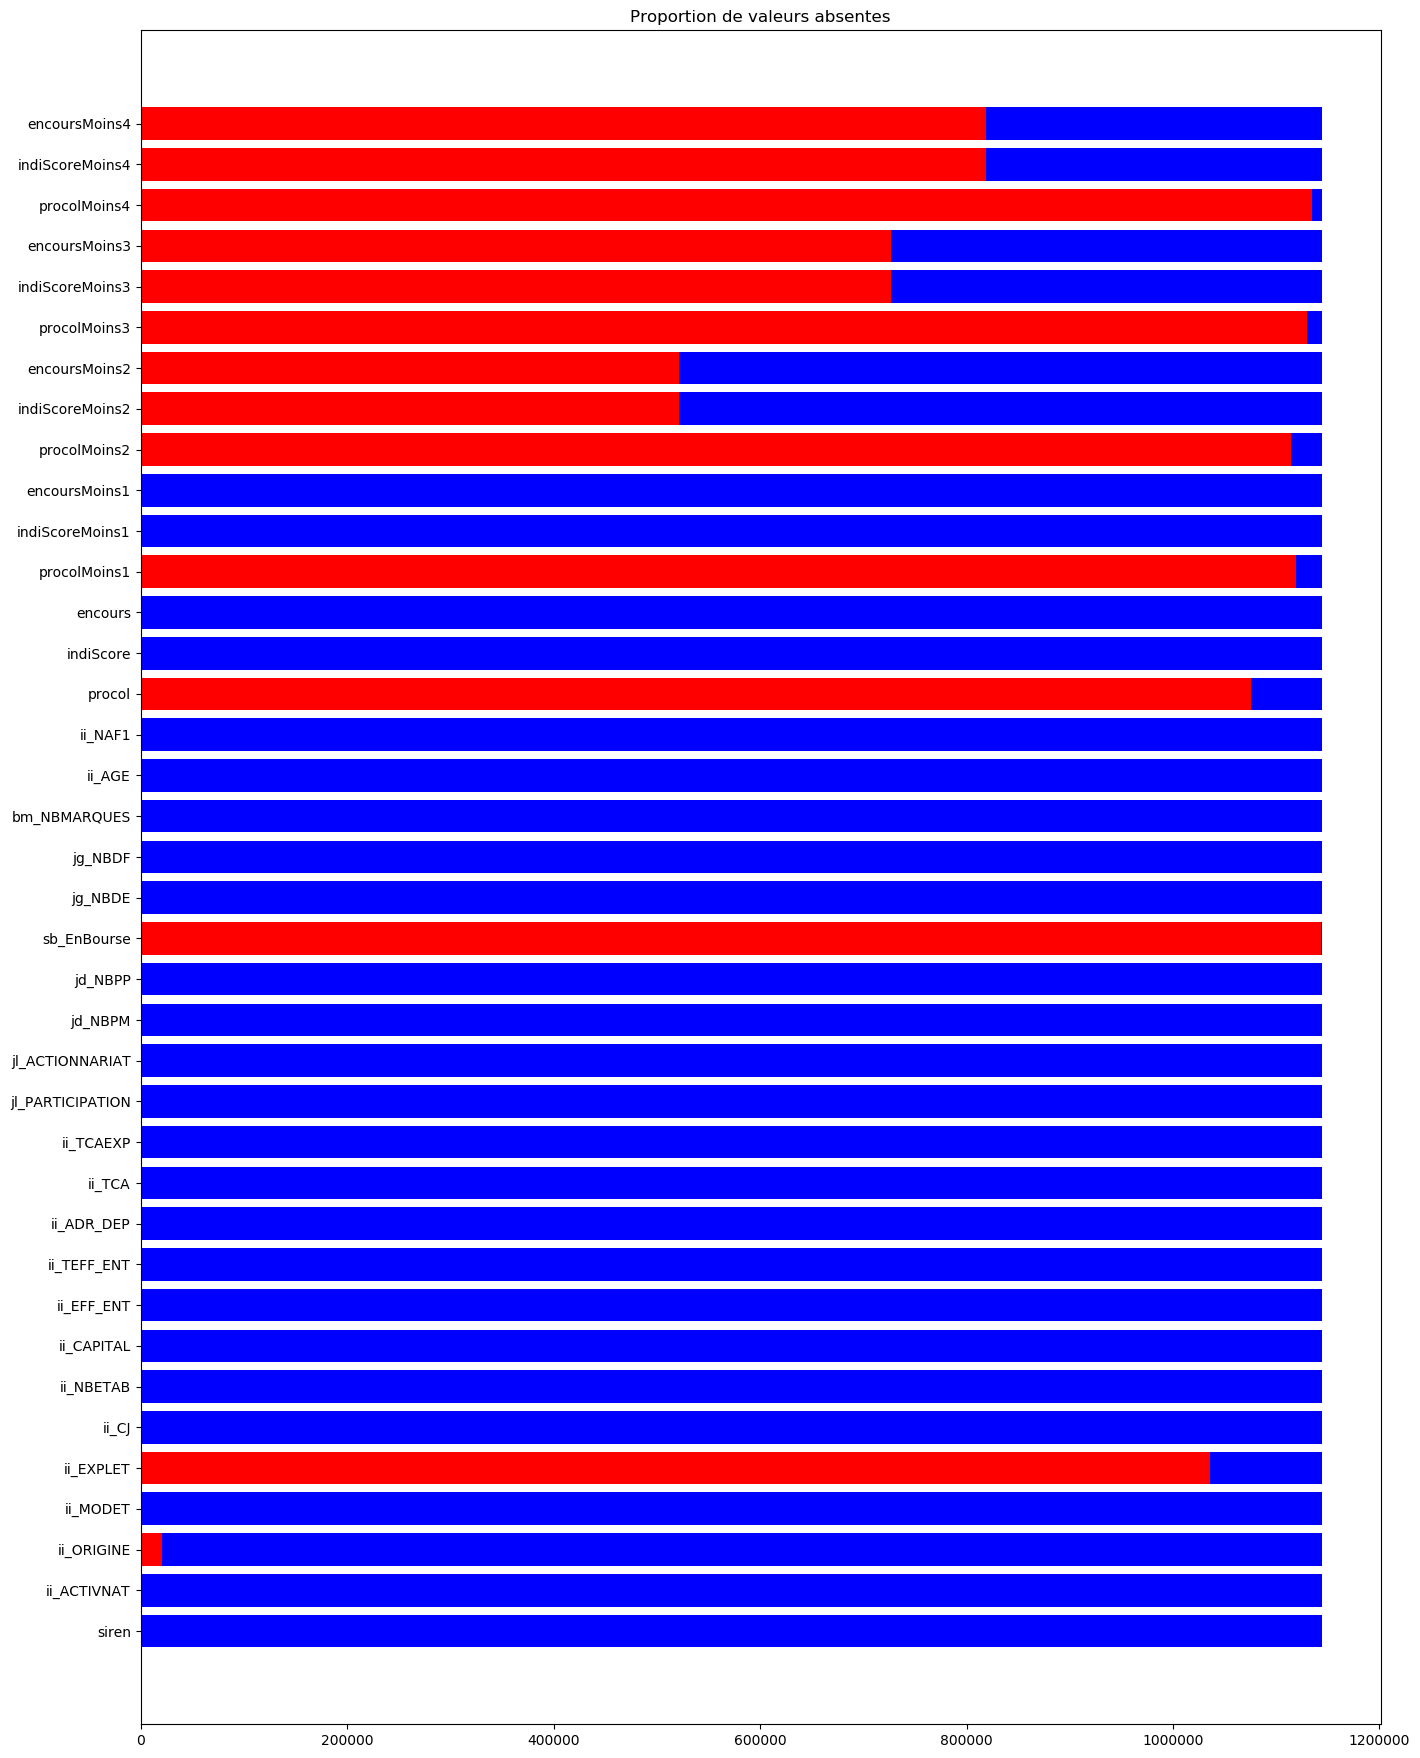

*** fillBlanks ***
	Nan de ii_ORIGINE remplacés par 1
	Nan de ii_EXPLET remplacés par O
	Nan de indiScore remplacés par 9.715781669910111
	Nan de encours remplacés par 21856.486626696253
	Nan de indiScoreMoins1 remplacés par 9.799356731587993
	Nan de encoursMoins1 remplacés par 20405.54998234025
	Nan de indiScoreMoins2 remplacés par 10.300353459032637
	Nan de encoursMoins2 remplacés par 30325.616637840634
	Nan de indiScoreMoins3 remplacés par 10.277438226944739
	Nan de encoursMoins3 remplacés par 38967.65612814206
	Nan de indiScoreMoins4 remplacés par 10.553874382237959
	Nan de encoursMoins4 remplacés par 43863.9438051683
	Nan de ii_ORIGINE remplacés par 0
	Nan de ii_EXPLET remplacés par 0
	Nan de sb_EnBourse remplacés par 0


1075560 SIREN actifs il y a 12 mois
	 837555 TP (True Positifs)
	 238005 FN (False Negatifs)
68286 SIREN en défaut
	 35568 FP (False Positifs)
	 32718 TN (True Negatifs)


In [4]:
df = loadTableCJ(CT_CJ, bBilan=False)

In [5]:
df.head()

siren ii_ACTIVNAT ii_ORIGINE ii_MODET ii_EXPLET ii_CJ  ii_NBETAB  \
1  5420120           0          0      nan         0  5599          0   
2  5450093          10          9      nan         0  5499          0   
3  5450119           0          9      nan         0  5498          0   
4  5480546           0          0      nan         0  5710          0   
5  5520028           0          1      nan         N  5499          0   

   ii_CAPITAL  ii_EFF_ENT ii_TEFF_ENT ii_ADR_DEP ii_TCA ii_TCAEXP  \
1      711840          10          11         62    0.0       nan   
2       18750           1          01         04    nan       nan   
3       14178           0          00         04    nan       nan   
4      310000          20          12         44    3.0       nan   
5           0           0          00         80    nan       nan   

   jl_PARTICIPATION  jl_ACTIONNARIAT  jd_NBPM  jd_NBPP  sb_EnBourse  jg_NBDE  \
1                 1                7        2        0          0.0        0   
2                 0                0        0        0          0.0        0   
3                 0                0        0        0          0.0        0   
4                 1                0        1        0          0.0        3   
5                 0                0        0        0          0.0        0   

   jg_NBDF  bm_NBMARQUES  ii_AGE ii_NAF1 procol  indiScore  encours  \
1        0             0      10       M                 9    30000   
2        0             0       8       G                11     1891   
3        0             0      10       I                 3        0   
4        4             7       3       C      P          0        0   
5        0             0      10       L                12    17000   

  procolMoins1  indiScoreMoins1  encoursMoins1 procolMoins2  indiScoreMoins2  \
1                           9.0        30000.0                           9.0   
2                          14.0         1975.0                          13.0   
3                           3.0            0.0                           3.0   
4            P              6.0            0.0                           6.0   
5                          12.0        17000.0                          12.0   

   encoursMoins2 procolMoins3  indiScoreMoins3  encoursMoins3 procolMoins4  \
1        30000.0                           9.0         7500.0                
2          749.0                          13.0          749.0                
3            0.0                           3.0            0.0                
4         8406.0            P              6.0         3555.0            P   
5        17000.0                          12.0        17000.0                

   indiScoreMoins4  encoursMoins4  target  
1              9.0         7500.0    True  
2             12.0          816.0    True  
3              3.0            0.0    True  
4              9.0        30000.0   False  
5             12.0        17000.0    True

In [20]:
# Les départements les plus représentés
df.groupby('ii_ADR_DEP')['siren'].count().sort_values(ascending=False)[:10]

ii_ADR_DEP
75    120177
13     42826
92     42282
69     41432
93     36669
97     33077
59     32494
06     30045
33     28391
94     25125
Name: siren, dtype: int64

In [22]:
# Les catégories juridiques les plus représentées
df.groupby('ii_CJ')['siren'].count().sort_values(ascending=False)[:5]

ii_CJ
5499    514320
5710    211786
5498    207856
5720    146445
5202     17704
Name: siren, dtype: int64

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143846 entries, 1 to 2453106
Data columns (total 39 columns):
siren               1143846 non-null int64
ii_ACTIVNAT         1143846 non-null object
ii_ORIGINE          1143846 non-null object
ii_MODET            1143846 non-null object
ii_EXPLET           1143846 non-null object
ii_CJ               1143846 non-null object
ii_NBETAB           1143846 non-null int64
ii_CAPITAL          1143846 non-null int64
ii_EFF_ENT          1143846 non-null int64
ii_TEFF_ENT         1143846 non-null object
ii_ADR_DEP          1143846 non-null object
ii_TCA              1143846 non-null object
ii_TCAEXP           1143846 non-null object
jl_PARTICIPATION    1143846 non-null int64
jl_ACTIONNARIAT     1143846 non-null int64
jd_NBPM             1143846 non-null int64
jd_NBPP             1143846 non-null int64
sb_EnBourse         1143846 non-null float64
jg_NBDE             1143846 non-null int64
jg_NBDF             1143846 non-null int64
bm_NBMARQUES    

None

## Description

In [7]:
# Code NAF
df.ii_NAF1.unique()

array(['M', 'G', 'I', 'C', 'L', 'H', 'Q', 'F', 'K', 'A', 'J', 'B', 'R',
       'S', 'E', 'D', 'N', 'P', 'O'], dtype=object)

Répartition selon ii_NAF1


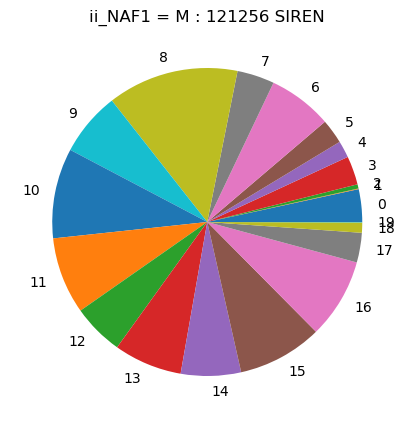

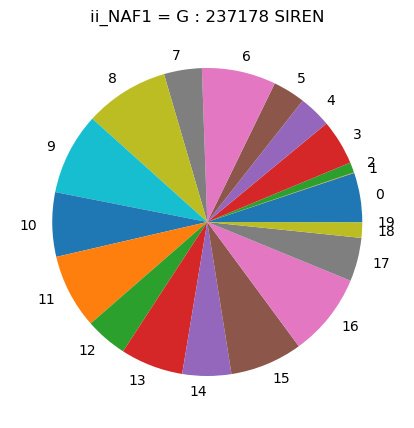

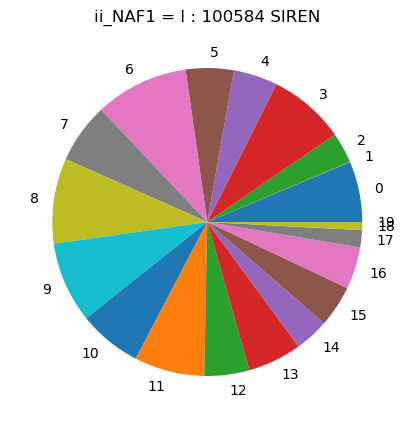

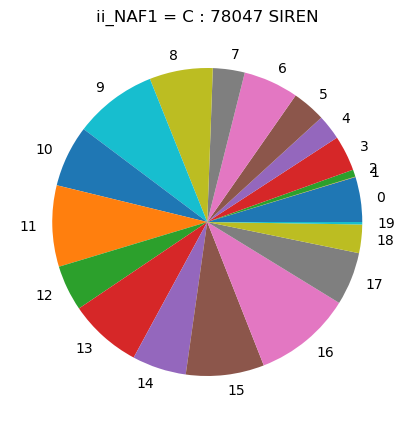

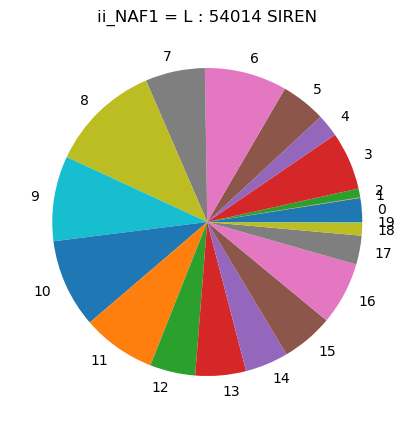

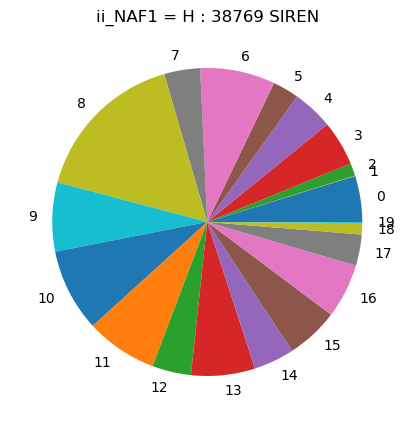

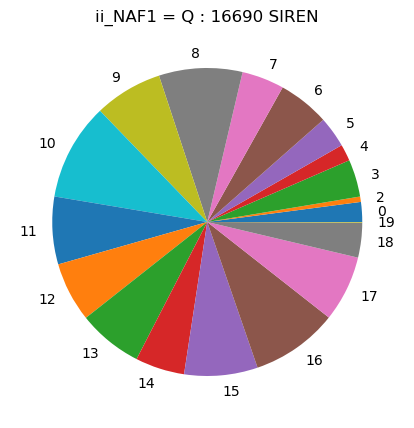

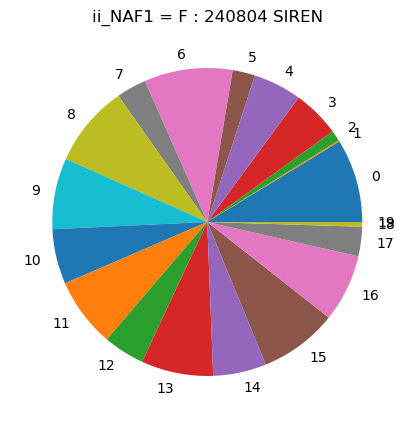

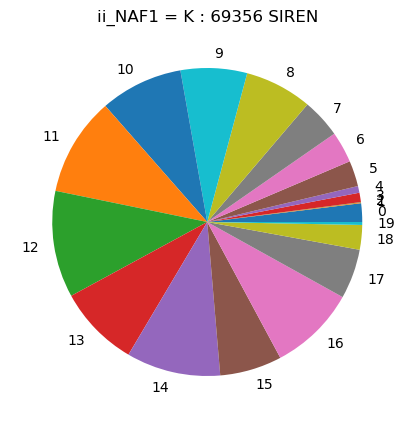

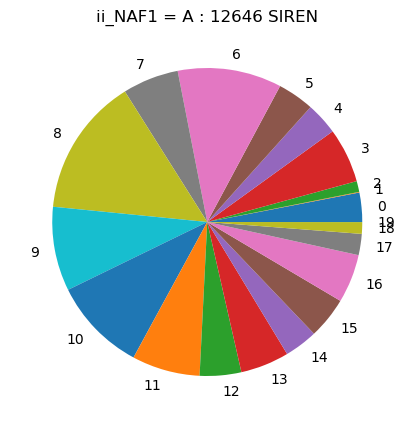

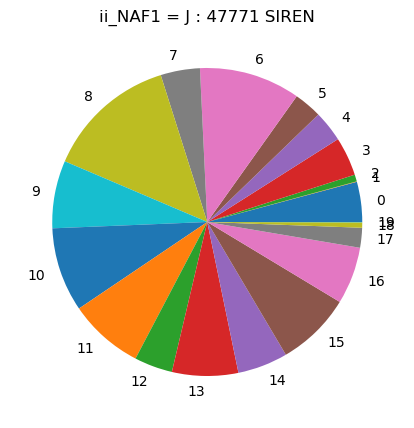

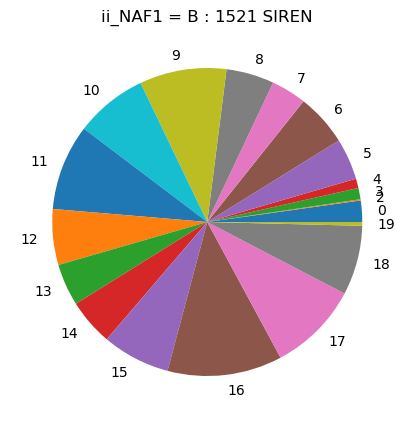

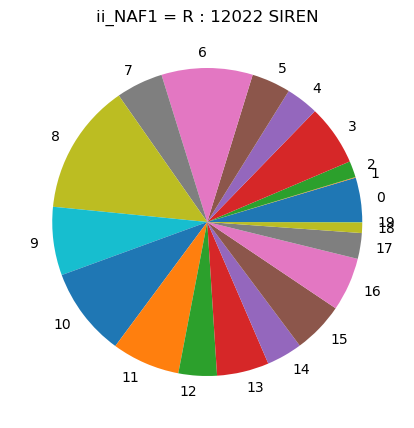

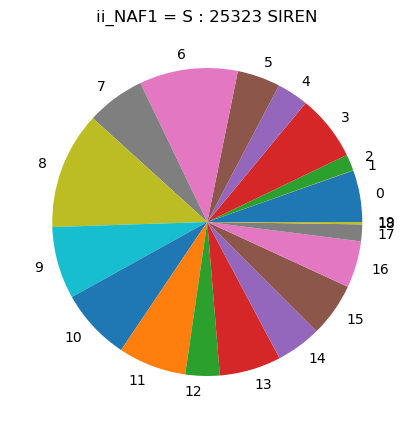

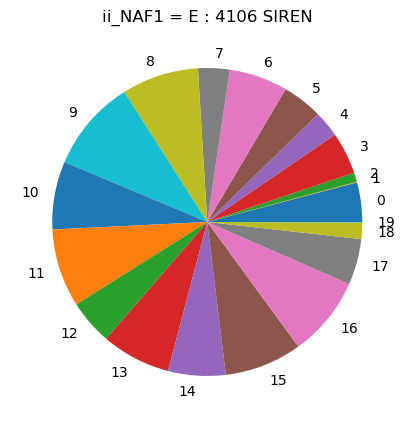

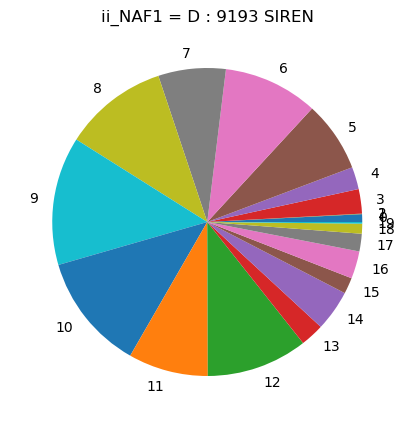

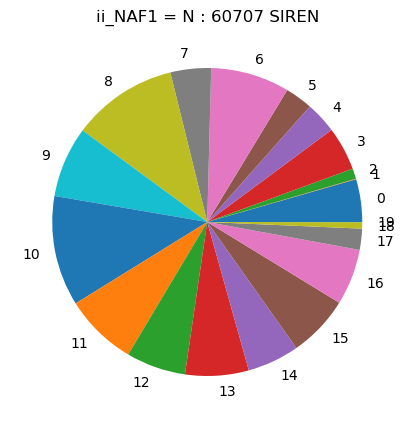

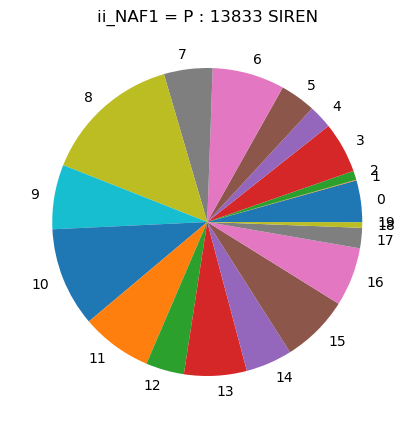

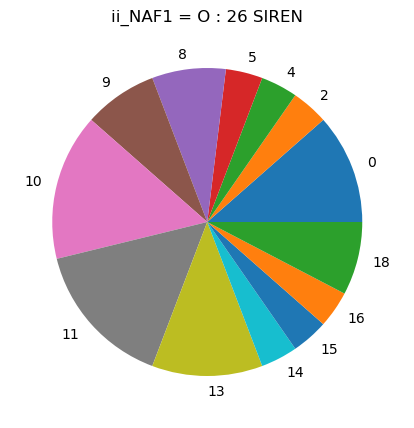

In [8]:
PieCategorie(df, 'ii_NAF1')

Répartition selon ii_AGE


C:\Users\Mscao\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


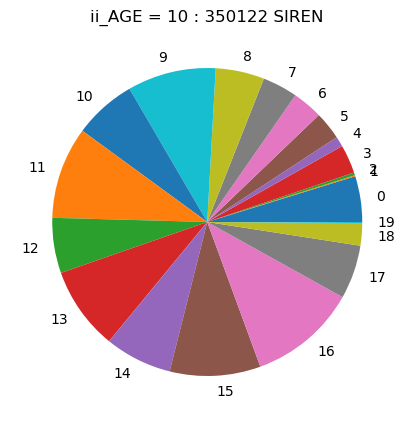

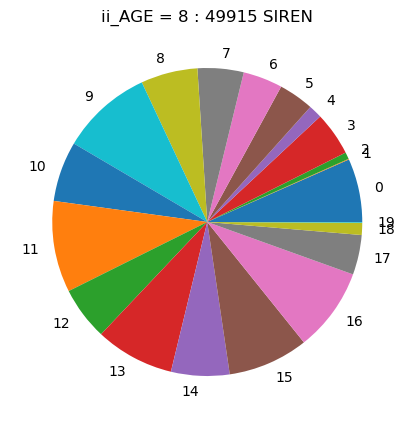

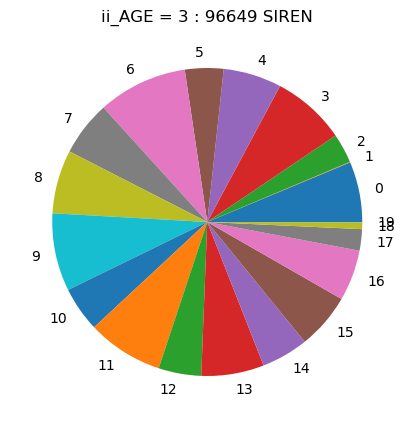

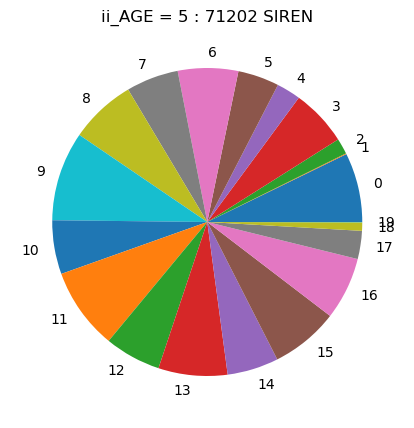

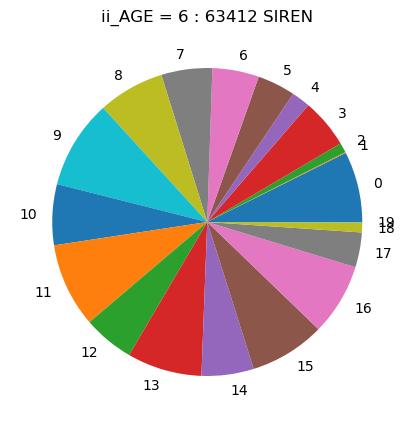

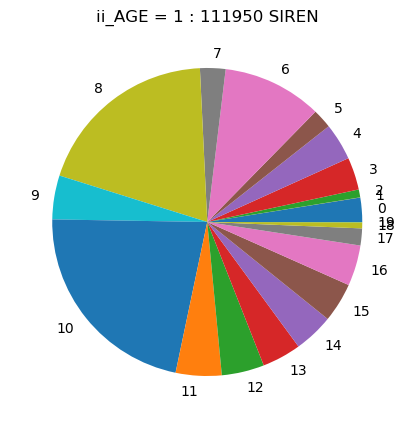

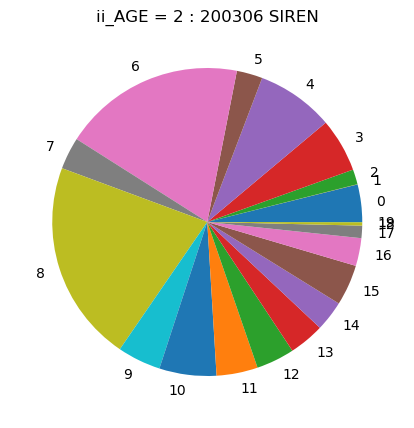

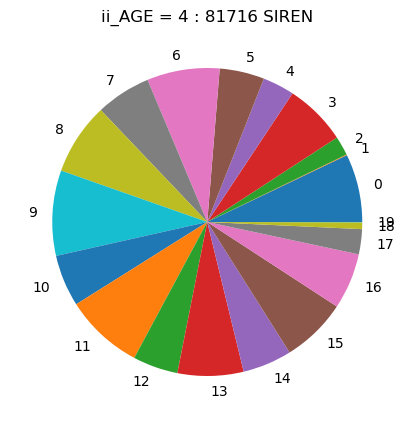

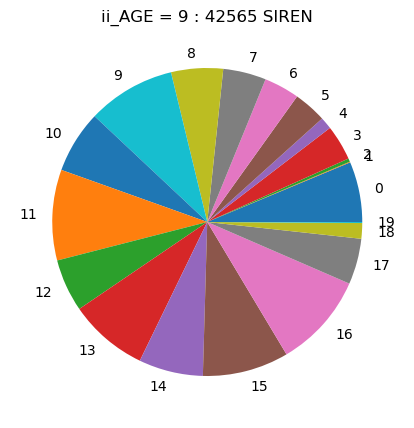

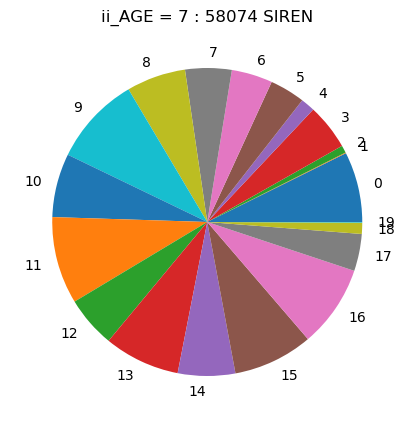

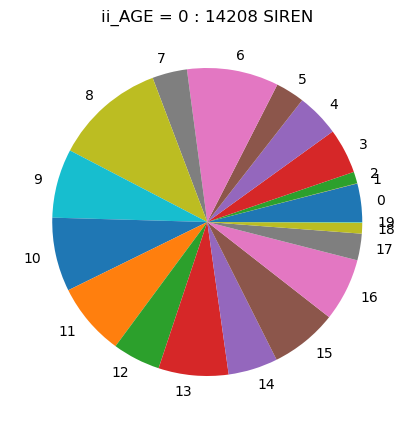

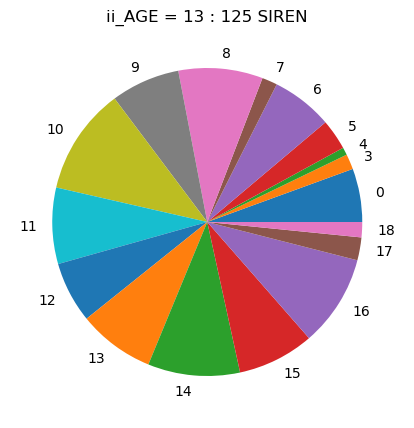

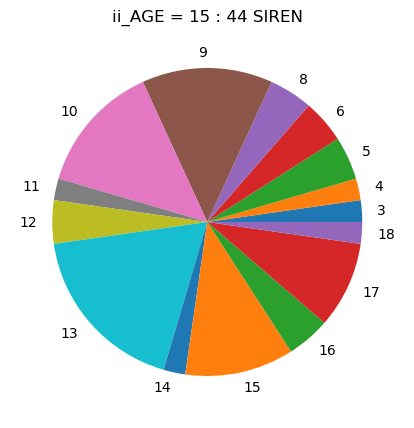

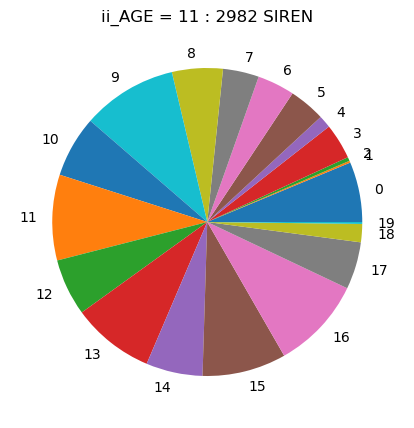

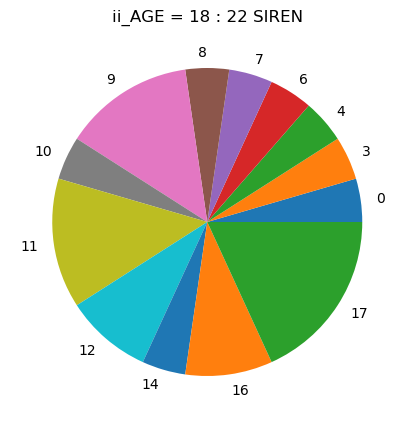

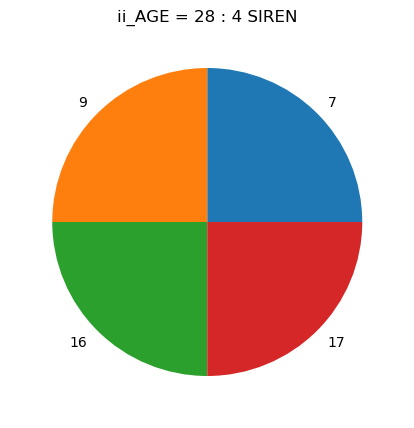

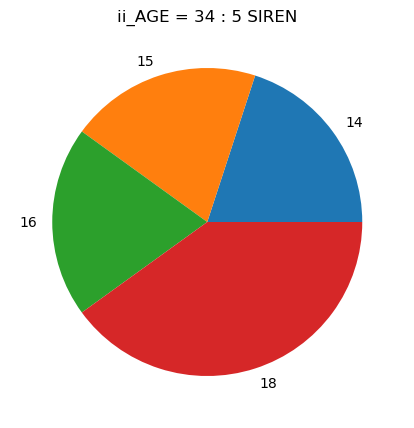

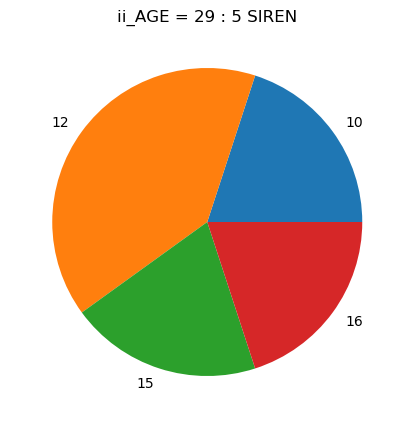

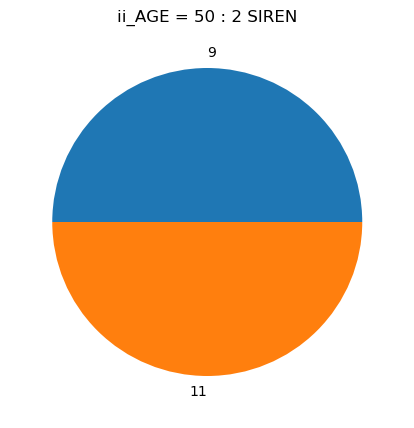

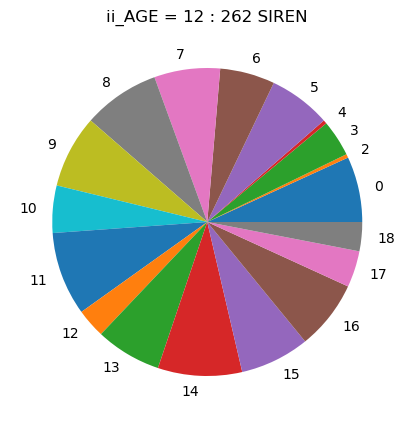

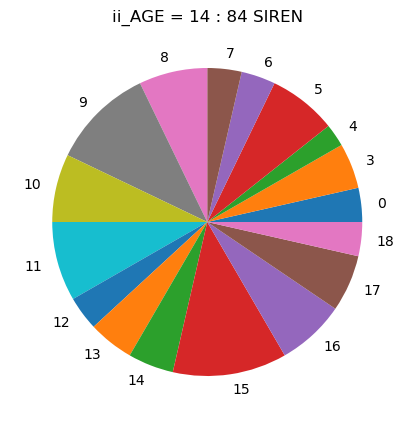

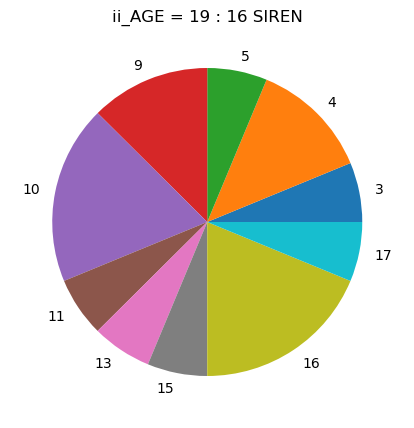

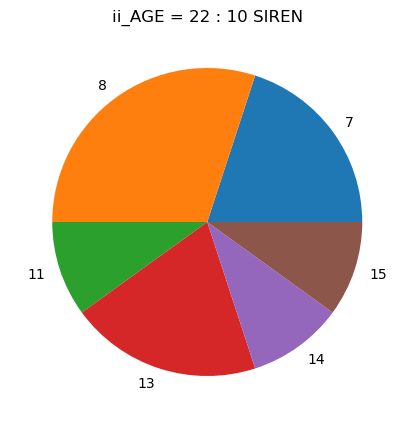

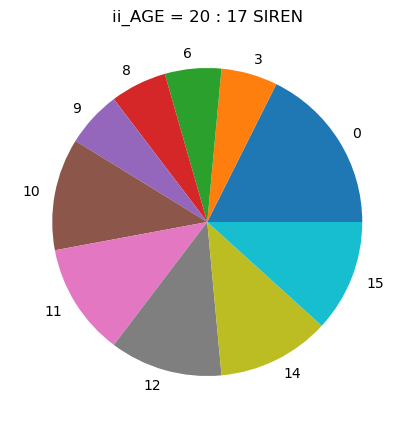

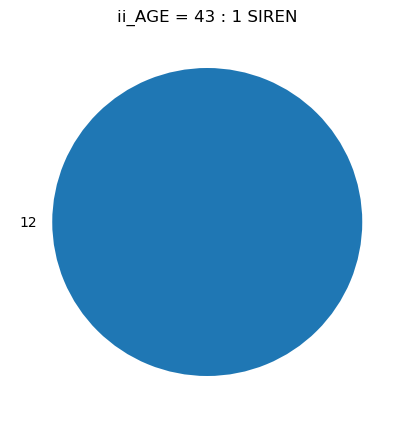

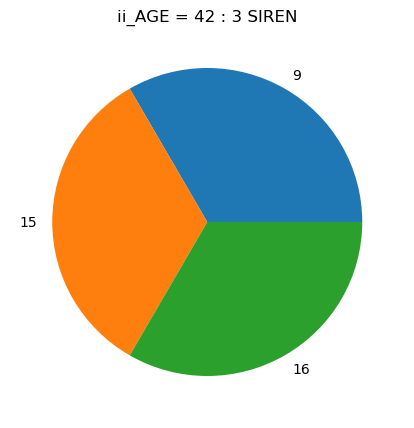

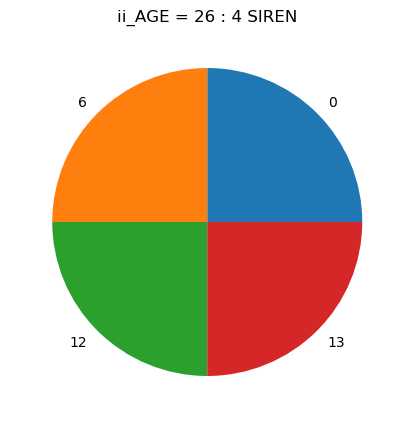

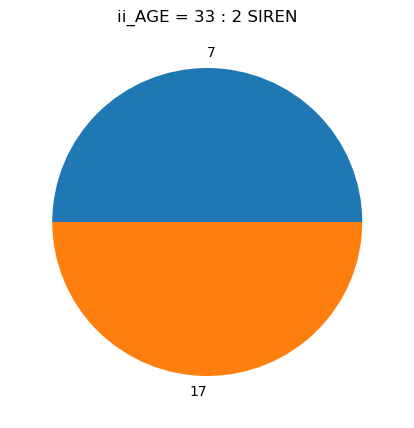

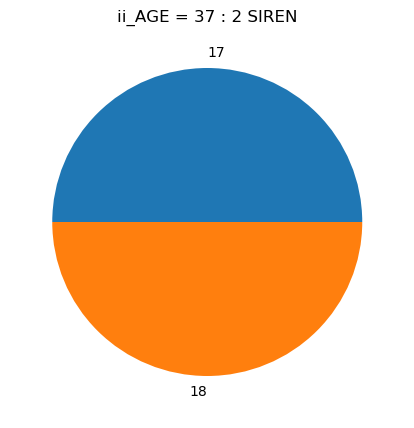

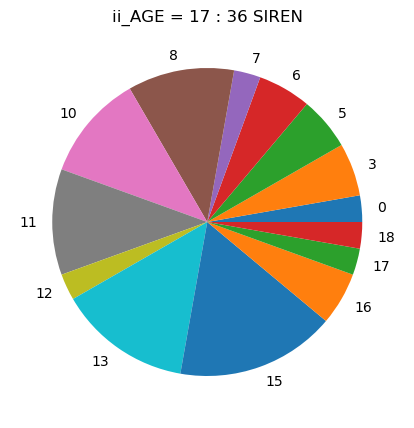

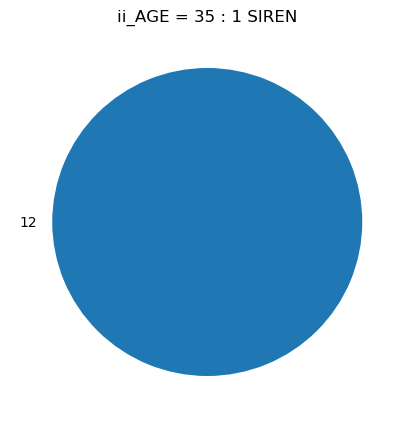

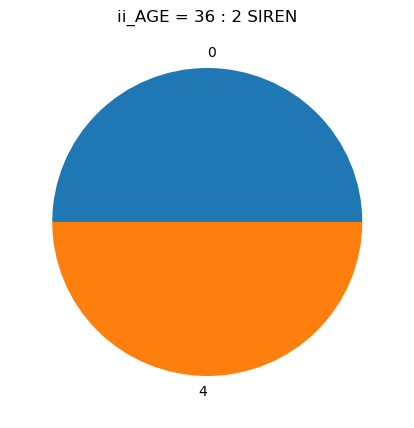

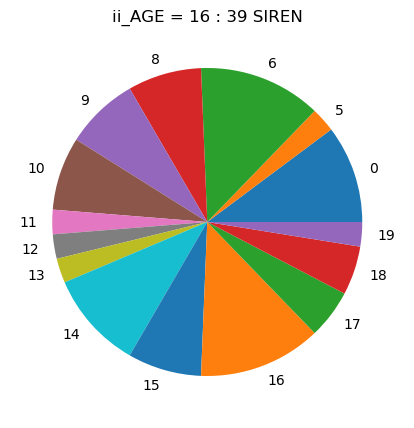

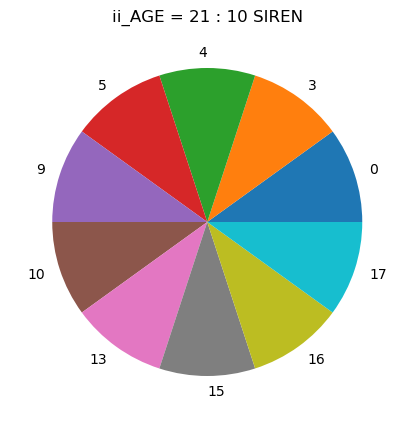

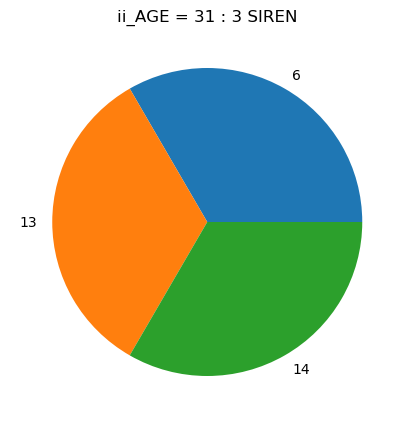

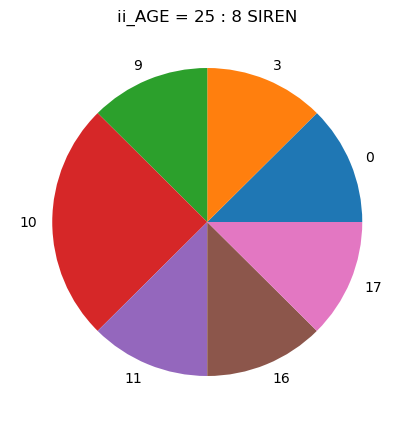

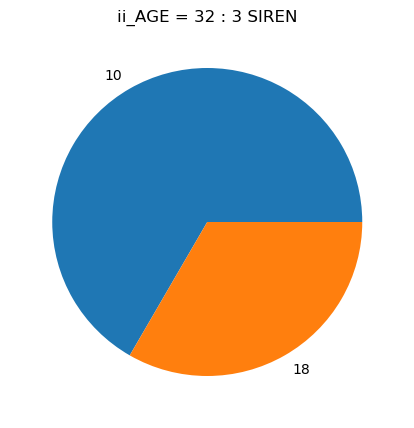

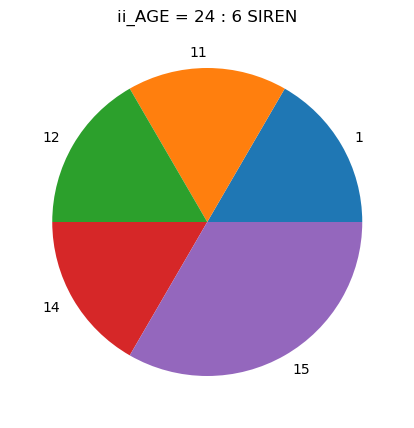

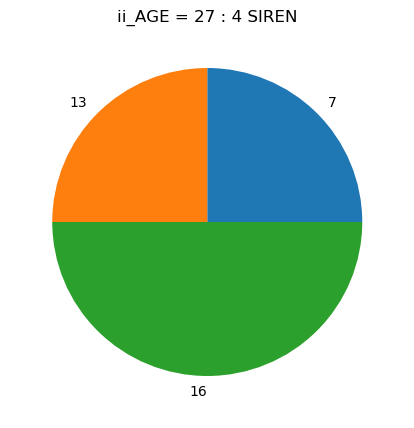

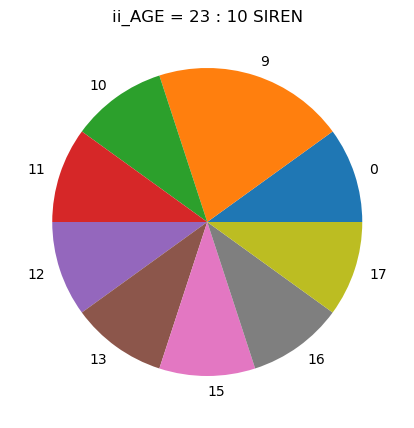

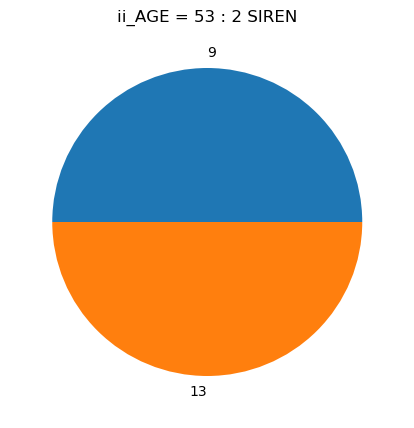

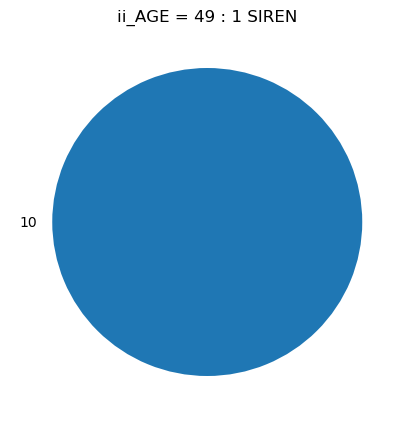

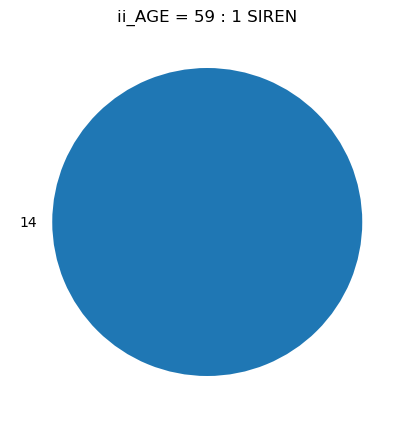

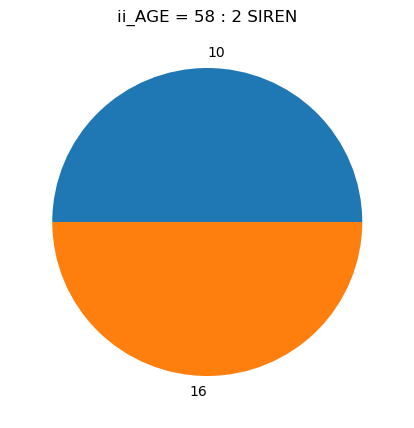

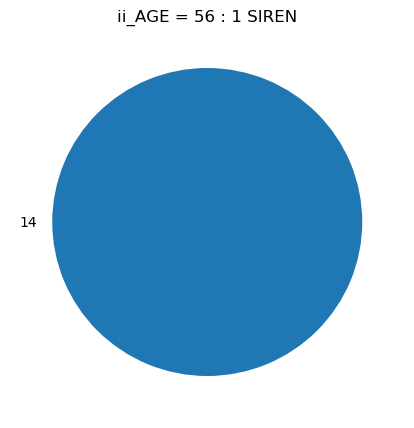

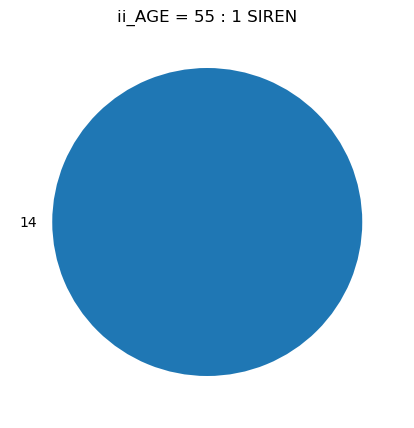

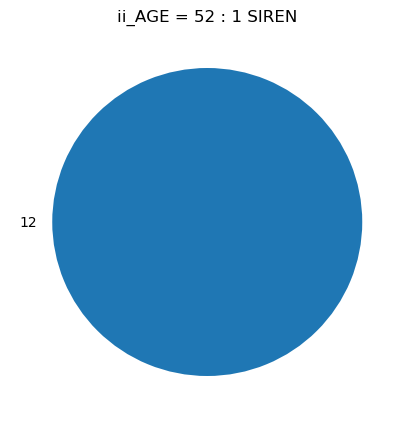

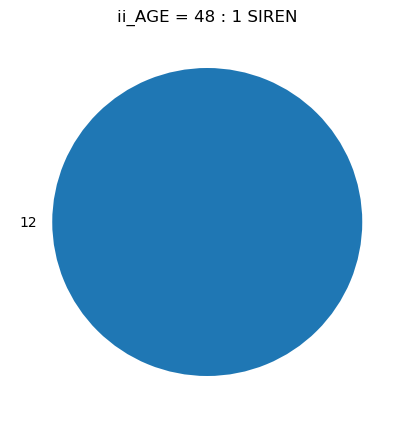

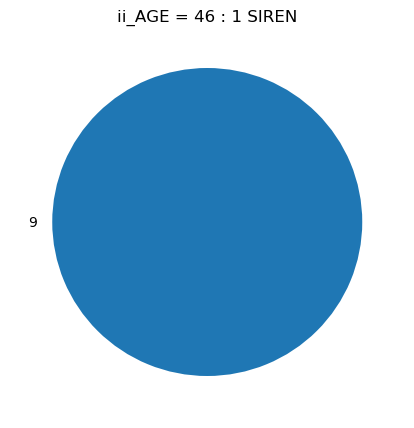

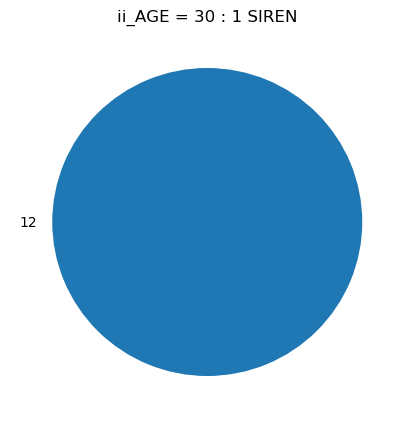

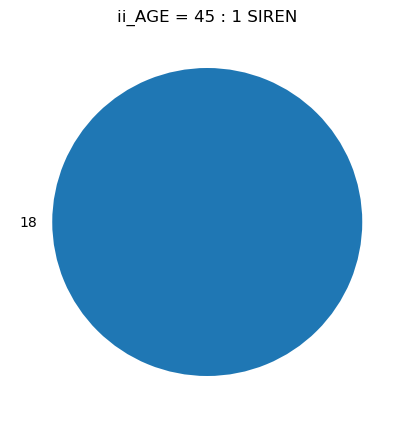

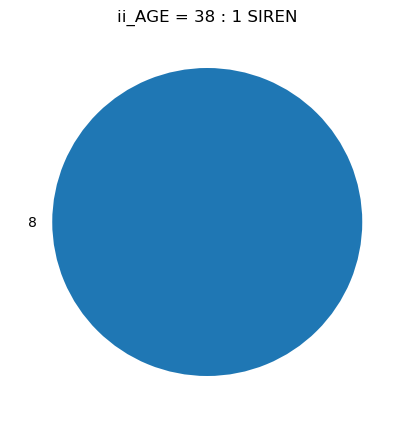

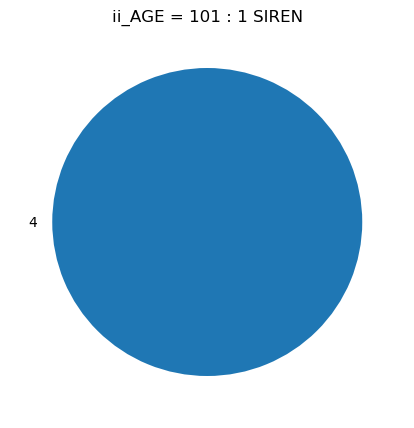

In [9]:
PieCategorie(df, 'ii_AGE')

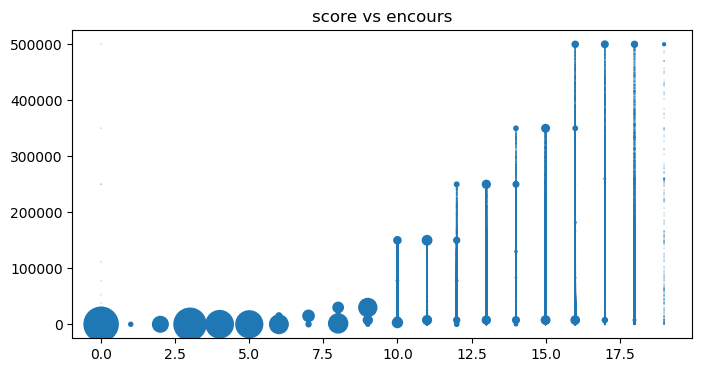

In [10]:
GraphWithSize(df['indiScore'], df['encours'], "score vs encours")

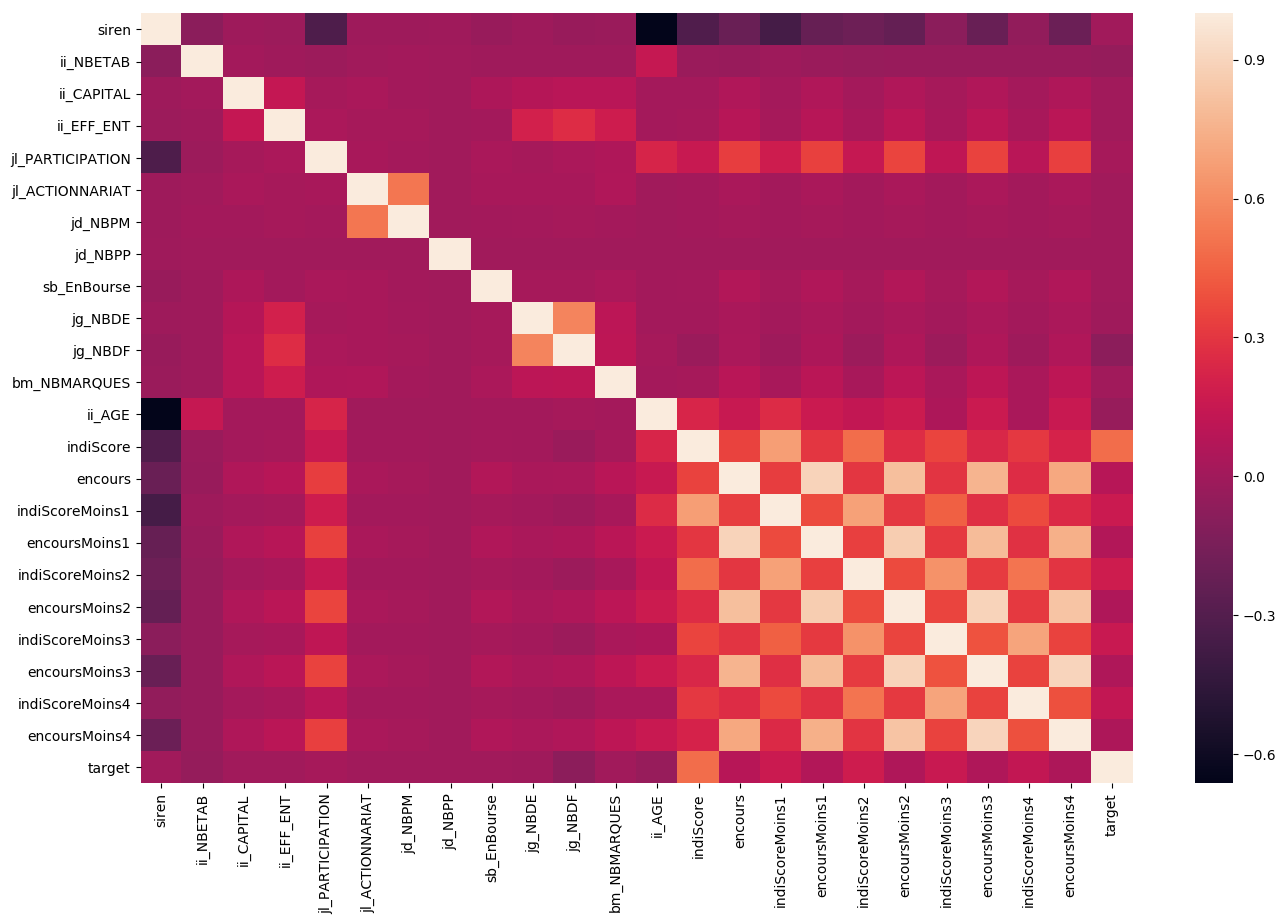

siren corrélé à : ['ii_AGE']
jl_ACTIONNARIAT corrélé à : ['jd_NBPM']
jg_NBDE corrélé à : ['jg_NBDF']
indiScore corrélé à : ['indiScoreMoins1']
encours corrélé à : ['encoursMoins1', 'encoursMoins2', 'encoursMoins3', 'encoursMoins4']
indiScoreMoins2 corrélé à : ['indiScoreMoins1', 'indiScoreMoins3', 'indiScoreMoins4']


In [11]:
correlation(df)

In [12]:
#GraphSeaborn(df, 'indiScore')

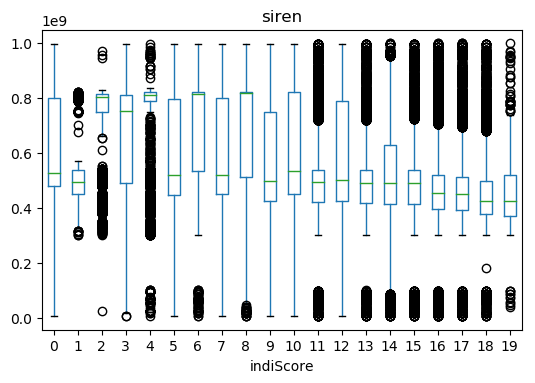

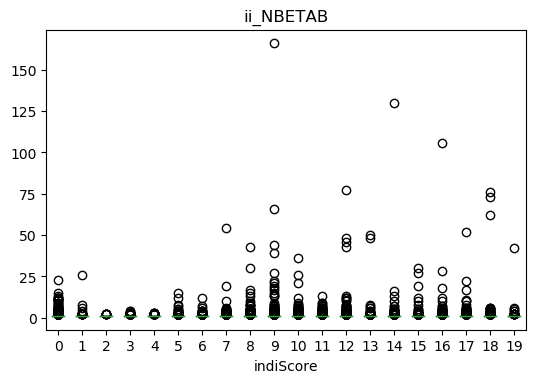

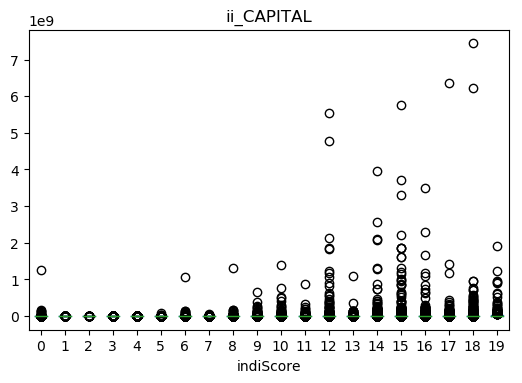

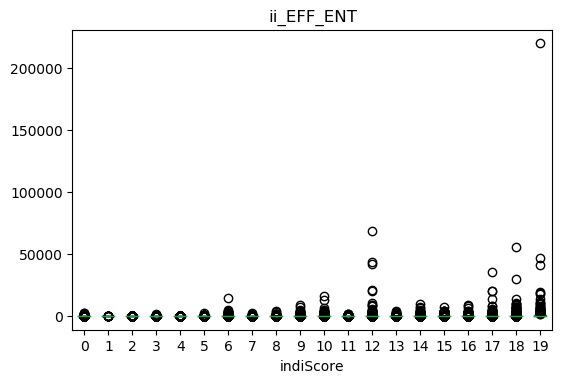

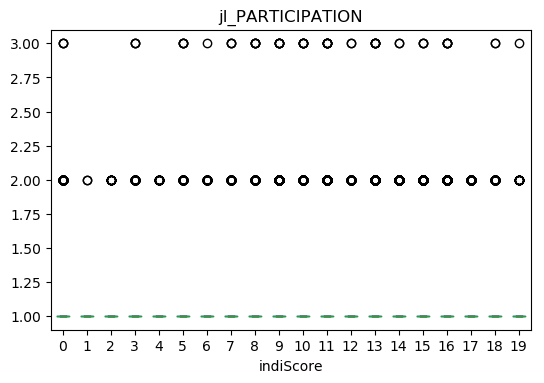

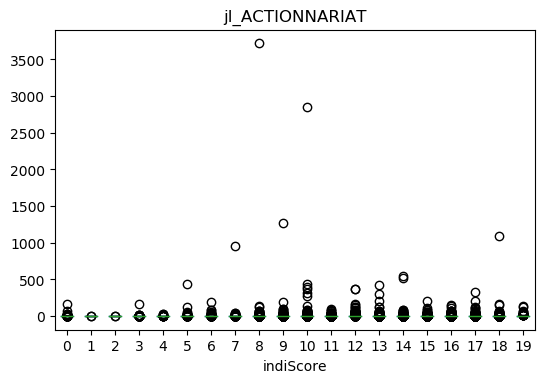

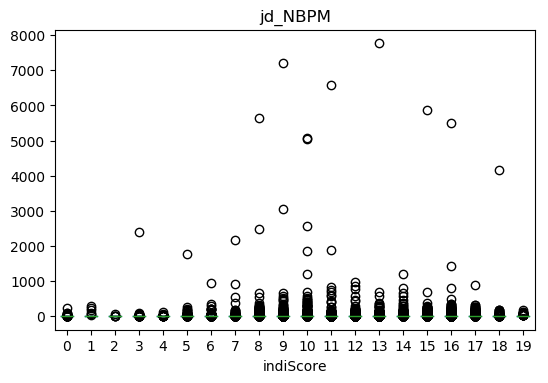

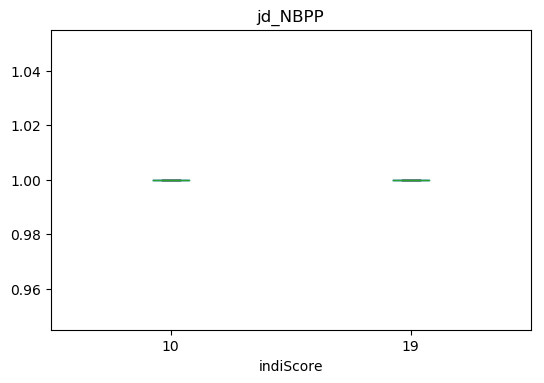

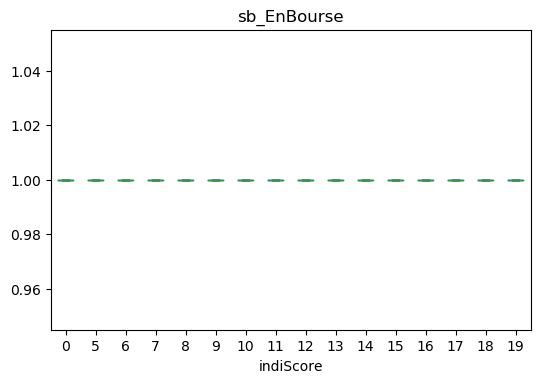

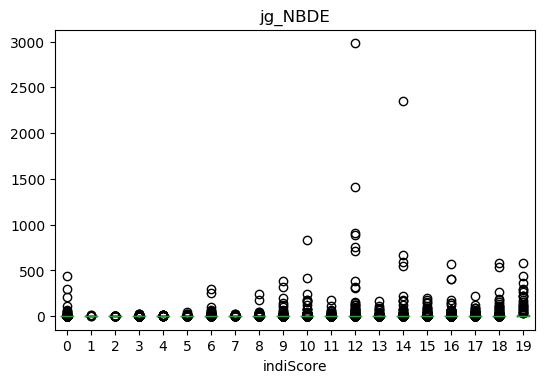

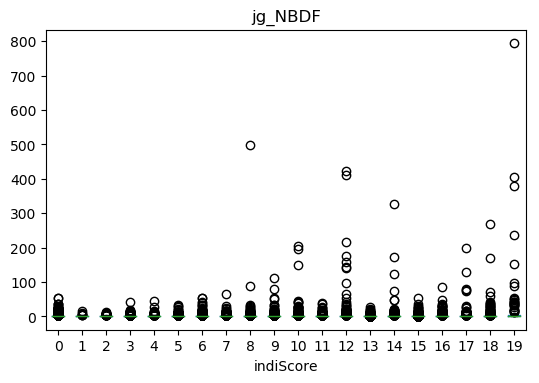

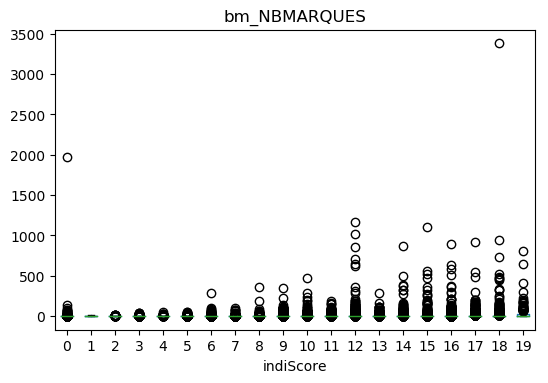

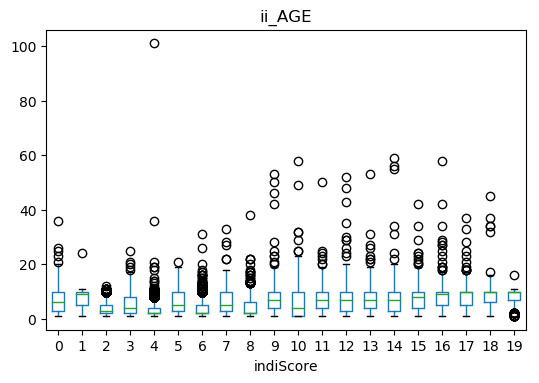

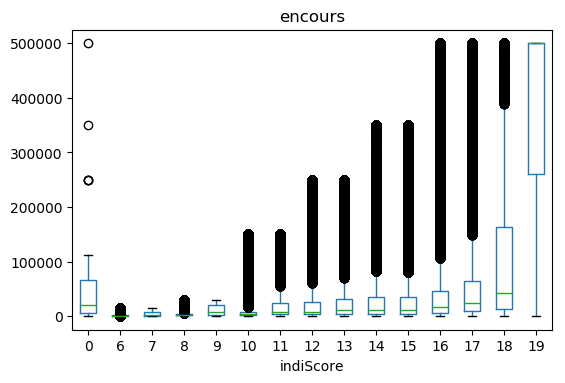

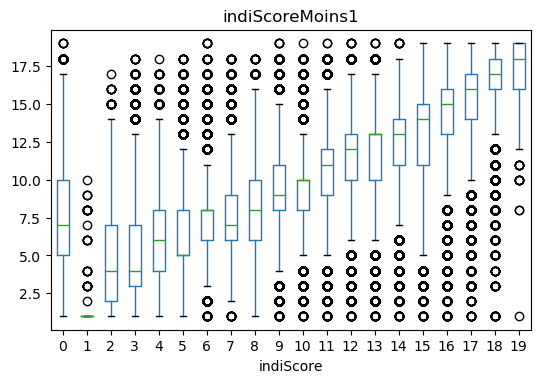

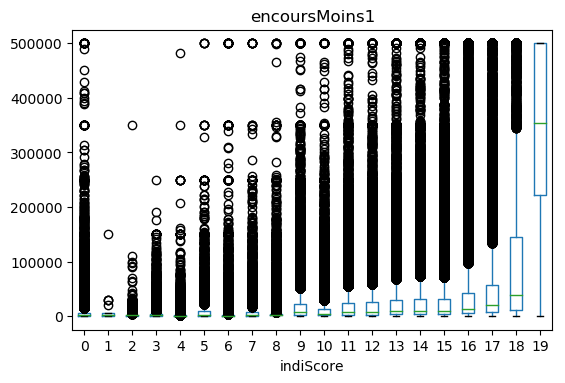

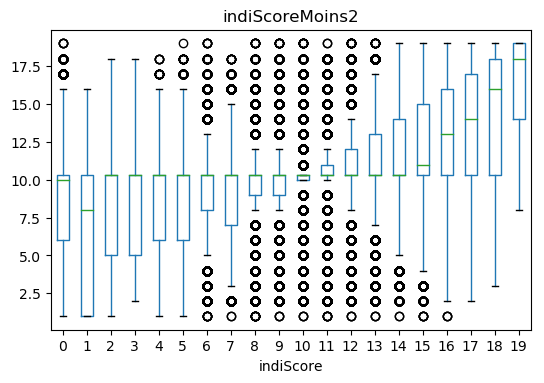

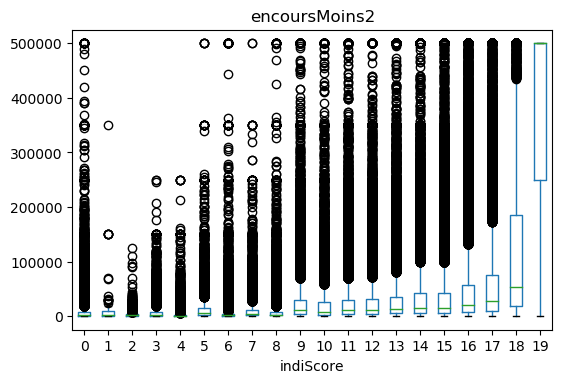

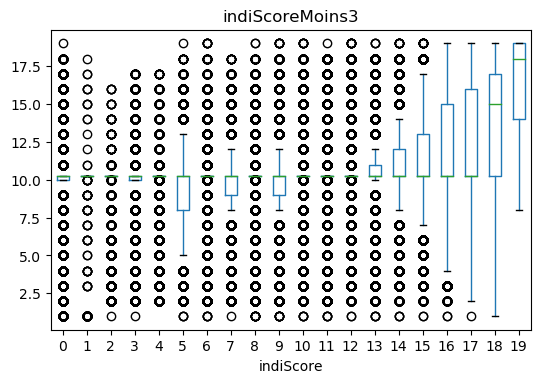

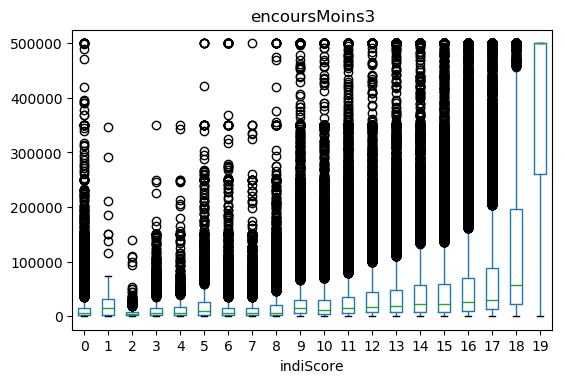

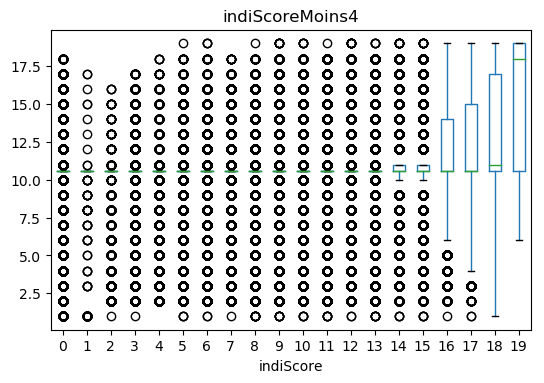

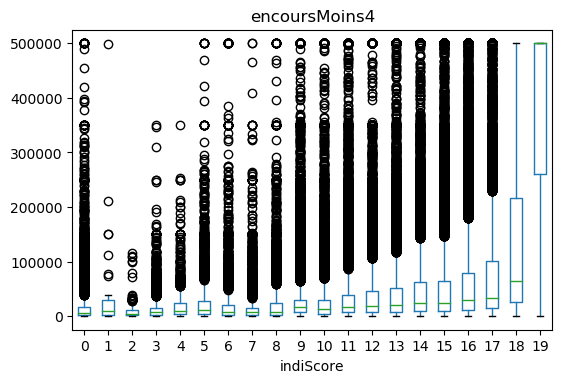

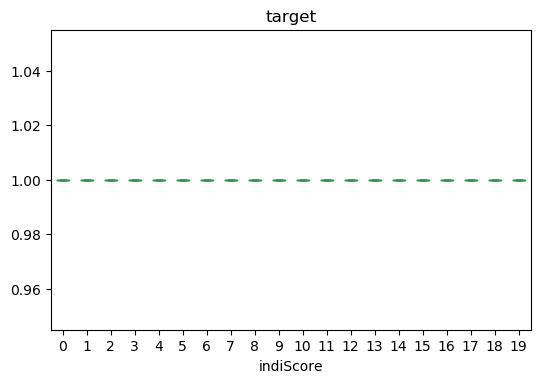

In [13]:
doBoxPlot(df, 'indiScore')

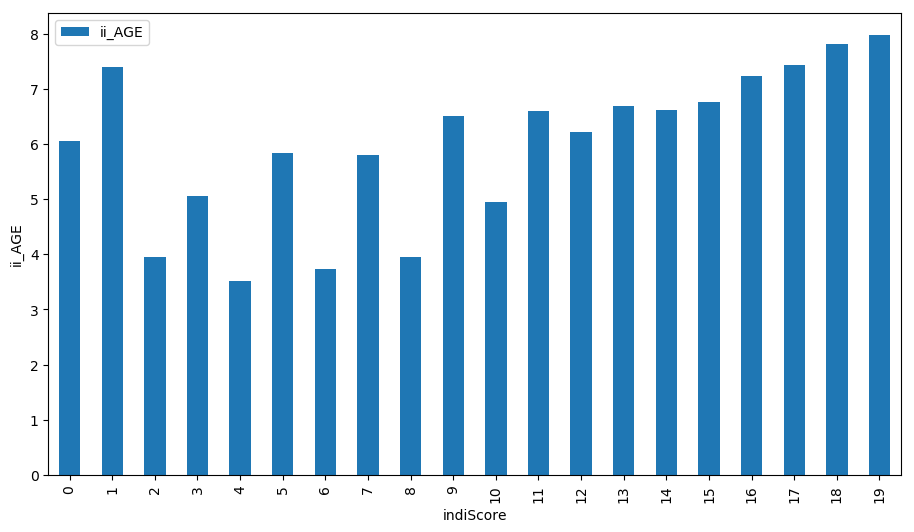

In [14]:
graphWithPlot(df, 'indiScore', 'ii_AGE', 'titre')

## Procédures collectives

In [15]:
df.procol.unique()

array(['', 'P', 'R', 'C', 'D', 'PL', 'PA', 'RR'], dtype=object)

In [16]:
df_procol = df[df.procol.notnull() & (df.procol.str.len()>0)]
df_procol = df_procol.groupby(['procol'])['ii_CJ'].aggregate('count').reset_index().sort_values('ii_CJ', ascending=False)
df_procol

procol  ii_CJ
2      P  39891
5      R  11750
1      D  11148
0      C   5475
4     PL     19
6     RR      2
3     PA      1

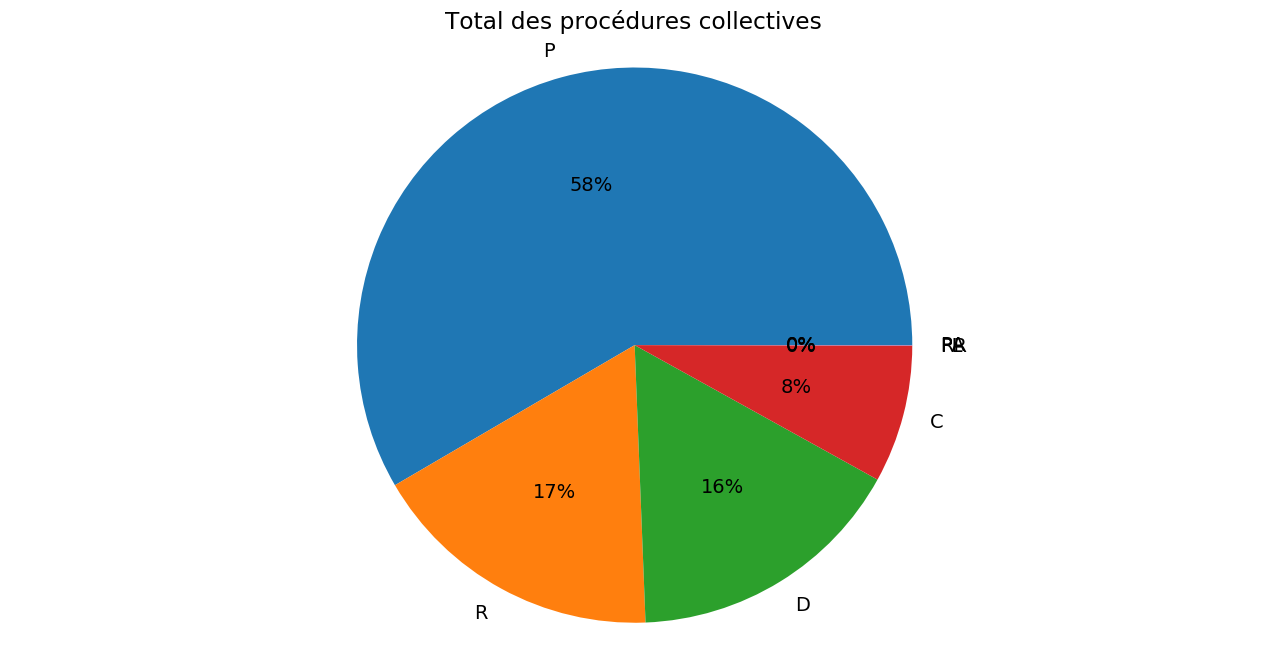

In [17]:
plt.rc('font', weight='normal', size=14)

fig = plt.figure(figsize=(16,8))
plt.pie(df_procol.ii_CJ, labels=df_procol.procol, autopct = lambda x:'{:1.0f}%'.format(x))
plt.axis('equal')
plt.title('Total des procédures collectives')
plt.show()

## Target

In [18]:
#df['target'] = (df['procol'].isnull())
df['target'].describe()

count     1143846
unique          2
top          True
freq      1075560
Name: target, dtype: object

In [19]:
df[df['indiScoreMoins1']<=6].shape[0]

270723

			Analyse de toutes les données
	AUC = 0.629
	Spécificité = 0.479
	Precision = 0.959
	Recall = 0.779


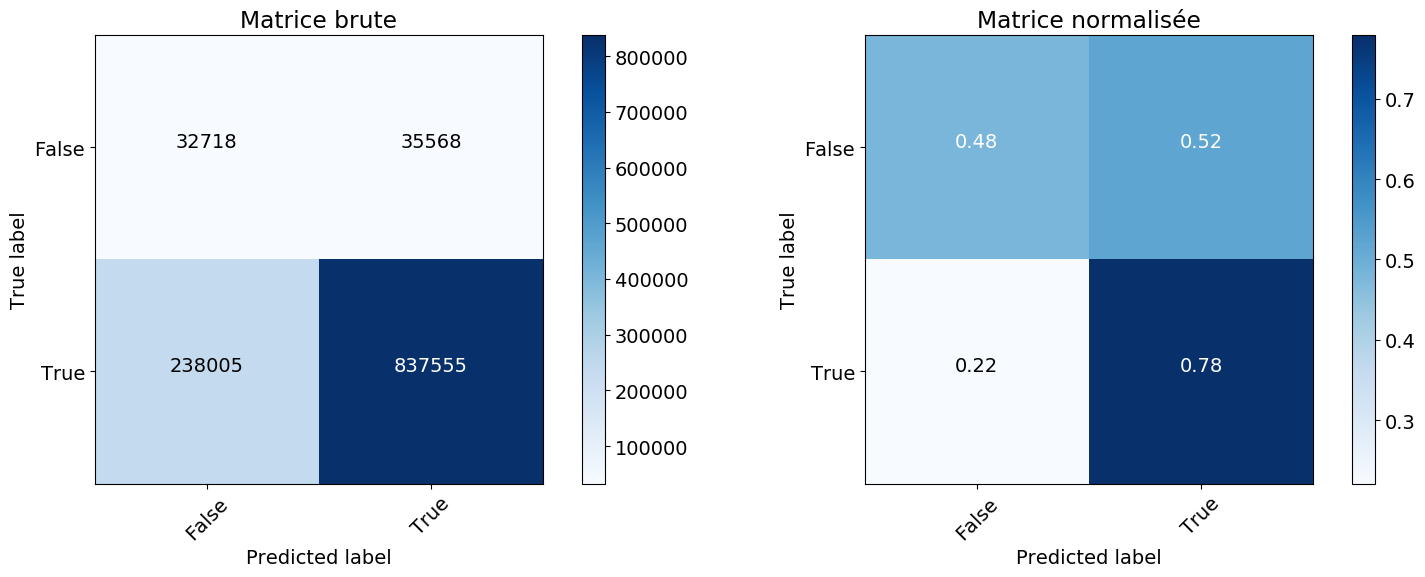

(array([0.  , 0.52, 1.  ]), array([0.  , 0.78, 1.  ]), 0.6289235801906446)

In [20]:
# Etat des lieux

# Compute confusion matrix - TOUTES LES DONNEES
print('\t\t\tAnalyse de toutes les données')
show_confusion_matrix(df['target'], (df.indiScoreMoins1>6))


In [21]:
# Etat des lieux
#for i in range(1, 10):
#    dfCJ = df[df.CJ==i]
#    if len(dfCJ)==0: continue
#    print('\t\t\tAnalyse des CJ', i)
#    show_confusion_matrix(dfCJ['target'], (dfCJ.indiScoreMoins1>6))


In [22]:
df.describe()

siren     ii_NBETAB    ii_CAPITAL    ii_EFF_ENT  \
count  1.143846e+06  1.143846e+06  1.143846e+06  1.143846e+06   
mean   5.882103e+08  9.567984e-02  2.532139e+05  7.699615e+00   
std    1.831789e+08  4.532915e-01  1.865733e+07  2.582966e+02   
min    5.420120e+06  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.394304e+08  0.000000e+00  0.000000e+00  0.000000e+00   
50%    5.177029e+08  0.000000e+00  0.000000e+00  1.000000e+00   
75%    8.042120e+08  0.000000e+00  5.000000e+03  3.000000e+00   
max    9.999907e+08  1.660000e+02  7.441822e+09  2.200000e+05   

       jl_PARTICIPATION  jl_ACTIONNARIAT       jd_NBPM       jd_NBPP  \
count      1.143846e+06     1.143846e+06  1.143846e+06  1.143846e+06   
mean       1.536431e-01     8.785798e-02  3.227594e-01  1.748487e-06   
std        3.659322e-01     5.070686e+00  1.878656e+01  1.322303e-03   
min        0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
max        3.000000e+00     3.720000e+03  7.769000e+03  1.000000e+00   

        sb_EnBourse       jg_NBDE       jg_NBDF  bm_NBMARQUES        ii_AGE  \
count  1.143846e+06  1.143846e+06  1.143846e+06  1.143846e+06  1.143846e+06   
mean   4.143914e-04  8.283807e-02  1.005258e-01  2.185347e-01  5.770733e+00   
std    2.035240e-02  4.809504e+00  1.545537e+00  5.861196e+00  3.518753e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  5.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+01   
max    1.000000e+00  2.980000e+03  7.940000e+02  3.381000e+03  1.010000e+02   

          indiScore       encours  indiScoreMoins1  encoursMoins1  \
count  1.143846e+06  1.143846e+06     1.143846e+06   1.143846e+06   
mean   9.715782e+00  2.185649e+04     9.799357e+00   2.040551e+04   
std    4.605785e+00  5.953284e+04     3.959951e+00   5.622582e+04   
min    0.000000e+00  0.000000e+00     1.000000e+00   0.000000e+00   
25%    6.000000e+00  7.000000e+02     7.000000e+00   5.770000e+02   
50%    1.000000e+01  3.127000e+03     1.000000e+01   2.604000e+03   
75%    1.300000e+01  1.500000e+04     1.300000e+01   1.363600e+04   
max    1.900000e+01  5.000000e+05     1.900000e+01   5.000000e+05   

       indiScoreMoins2  encoursMoins2  indiScoreMoins3  encoursMoins3  \
count     1.143846e+06   1.143846e+06     1.143846e+06   1.143846e+06   
mean      1.030035e+01   1.650903e+04     1.027744e+01   1.419666e+04   
std       3.079432e+00   5.391300e+04     2.627307e+00   5.188601e+04   
min       0.000000e+00   0.000000e+00     0.000000e+00   0.000000e+00   
25%       1.000000e+01   0.000000e+00     1.027744e+01   0.000000e+00   
50%       1.030035e+01   0.000000e+00     1.027744e+01   0.000000e+00   
75%       1.100000e+01   7.500000e+03     1.027744e+01   2.613000e+03   
max       1.900000e+01   5.000000e+05     1.900000e+01   5.000000e+05   

       indiScoreMoins4  encoursMoins4  
count     1.143846e+06   1.143846e+06  
mean      1.055387e+01   1.247714e+04  
std       2.297563e+00   4.928970e+04  
min       0.000000e+00   0.000000e+00  
25%       1.055387e+01   0.000000e+00  
50%       1.055387e+01   0.000000e+00  
75%       1.055387e+01   0.000000e+00  
max       1.900000e+01   5.000000e+05

In [23]:
df.select_dtypes(exclude=[np.number]).describe()

ii_ACTIVNAT ii_ORIGINE ii_MODET  ii_EXPLET    ii_CJ ii_TEFF_ENT  \
count      1143846    1143846  1143846    1143846  1143846     1143846   
unique          18         14        1          4       83          16   
top              0          1      nan          0     5499          00   
freq        674449     853931  1143846    1035801   514320      409355   

       ii_ADR_DEP   ii_TCA ii_TCAEXP  ii_NAF1   procol procolMoins1  \
count     1143846  1143846   1143846  1143846  1143846      1143846   
unique         99       11         1       19        8            8   
top            75      nan       nan        F                         
freq       120177  1071246   1143846   240804  1075560      1119270   

       procolMoins2 procolMoins3 procolMoins4   target  
count       1143846      1143846      1143846  1143846  
unique           10            9            9        2  
top                                               True  
freq        1114528      1129544      1134338  1075560

## Outliers

In [34]:
CheckOutliers(df)

CheckOutliers
4424 valeurs supérieures à 1.000000 pour ii_NBETAB (max=166.000000)
26268 valeurs supérieures à 369890.000000 pour ii_CAPITAL (max=7441822000.000000)
27493 valeurs supérieures à 31.000000 pour ii_EFF_ENT (max=220000.000000)
2095 valeurs supérieures à 1.000000 pour jl_PARTICIPATION (max=3.000000)
1769 valeurs supérieures à 7.000000 pour jl_ACTIONNARIAT (max=3720.000000)
2689 valeurs supérieures à 19.000000 pour jd_NBPM (max=7769.000000)
933 valeurs supérieures à 7.000000 pour jg_NBDE (max=2980.000000)
979 valeurs supérieures à 7.000000 pour jg_NBDF (max=794.000000)
2659 valeurs supérieures à 13.000000 pour bm_NBMARQUES (max=3381.000000)
9 valeurs supérieures à 50.000000 pour ii_AGE (max=101.000000)
55422 valeurs supérieures à 115774.000000 pour encours (max=500000.000000)
55278 valeurs supérieures à 109159.000000 pour encoursMoins1 (max=500000.000000)
32322 valeurs supérieures à 16.000000 pour indiScoreMoins2 (max=19.000000)
39164 valeurs supérieures à 134343.699827 pour e

## Préparation des data

In [24]:
dropcols = ['procol', 'msoScore', 'indiScore', 'encours', 'siren']
x_train, x_test, y_train, y_test, y_pred_actuelle, x_final = prepareData(df, CT_CJ, dropcols, p_strat=df['target'], bSave=False)

Numérique :
	 ['ii_NBETAB', 'ii_CAPITAL', 'ii_EFF_ENT', 'jl_PARTICIPATION', 'jl_ACTIONNARIAT', 'jd_NBPM', 'jd_NBPP', 'sb_EnBourse', 'jg_NBDE', 'jg_NBDF', 'bm_NBMARQUES', 'ii_AGE', 'indiScoreMoins1', 'encoursMoins1', 'indiScoreMoins2', 'encoursMoins2', 'indiScoreMoins3', 'encoursMoins3', 'indiScoreMoins4', 'encoursMoins4']
Catégories :
	 ['ii_ACTIVNAT', 'ii_ORIGINE', 'ii_MODET', 'ii_EXPLET', 'ii_CJ', 'ii_TEFF_ENT', 'ii_ADR_DEP', 'ii_TCA', 'ii_TCAEXP', 'ii_NAF1', 'procolMoins1', 'procolMoins2', 'procolMoins3', 'procolMoins4']
CJ5_column_ii_ACTIVNAT loaded


C:\Users\Mscao\Google Drive\Jupyter\GIT\Projet8\score_functions.py:329: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  X[col] = X[col].astype('category', categories=lst)


CJ5_column_ii_ORIGINE loaded
CJ5_column_ii_MODET loaded
CJ5_column_ii_EXPLET loaded
CJ5_column_ii_CJ loaded
CJ5_column_ii_TEFF_ENT loaded
CJ5_column_ii_ADR_DEP loaded
CJ5_column_ii_TCA loaded
CJ5_column_ii_TCAEXP loaded
CJ5_column_ii_NAF1 loaded
CJ5_column_procolMoins1 loaded
CJ5_column_procolMoins2 loaded
CJ5_column_procolMoins3 loaded
CJ5_column_procolMoins4 loaded
Après binarisation les catégories prennent 302 dimensions.
x_train : (915076, 322)


Analyse du jeu de test
	AUC = 0.628
	Spécificité = 0.478
	Precision = 0.959
	Recall = 0.779


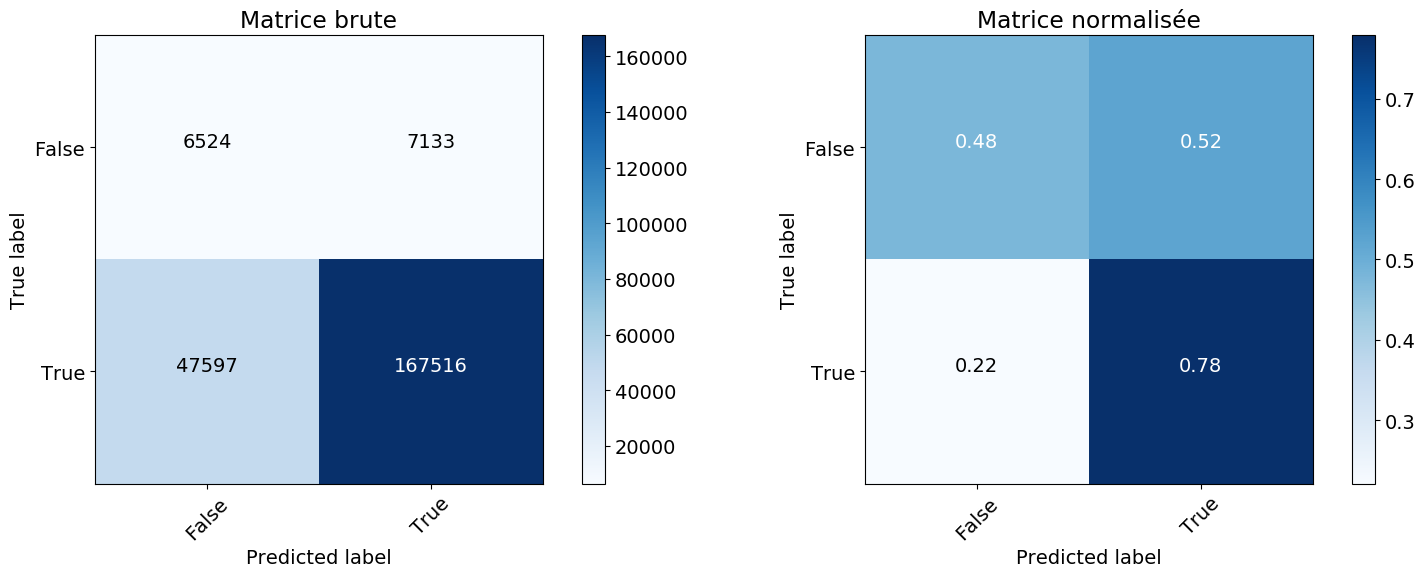

(array([0.  , 0.52, 1.  ]), array([0.  , 0.78, 1.  ]), 0.6282193195717146)

In [25]:
print('Analyse du jeu de test')
# Compute confusion matrix - JEU DE TEST
show_confusion_matrix(y_test, y_pred_actuelle)

## Réduction dimensionnelle

In [26]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

#Réduc dimensionnelle
print(x_test.shape)
print(x_train.shape)


(228770, 322)
(915076, 322)


In [27]:
reducPCA, X_red = testPCA(pd.merge(x_test, x_train))
X_red.shape

reducTSVD, X_red = testTSVD(pd.merge(x_test, x_train))
X_red.shape

x_train_reduced = reducPCA.transform(x_train)
x_test_reduced = reducPCA.transform(x_test)

Nombre de dimensions original : 322
PCA, nombre de dimensions pour 90% d'explication : 12
TSVD, nombre de dimensions pour 90% d'explication : 12


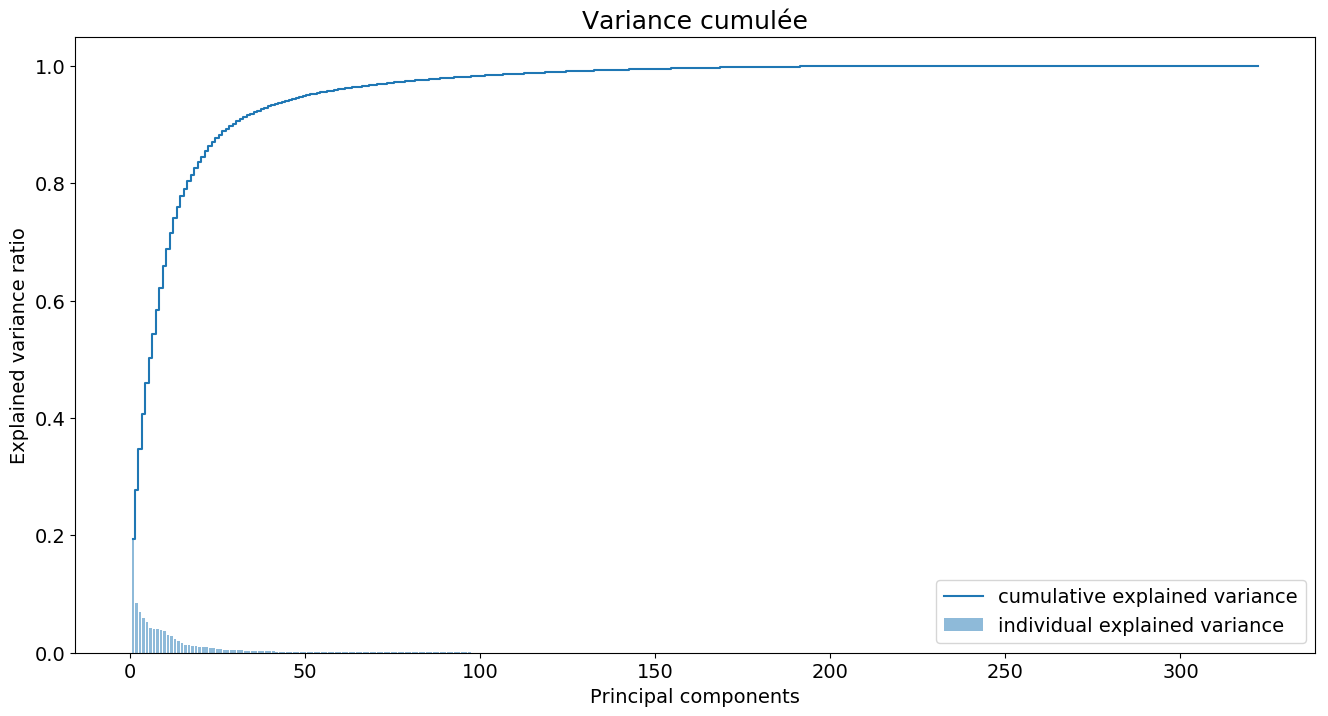

Deux composantes nous permettent d'expliquer 27.81 pourcent de la variance




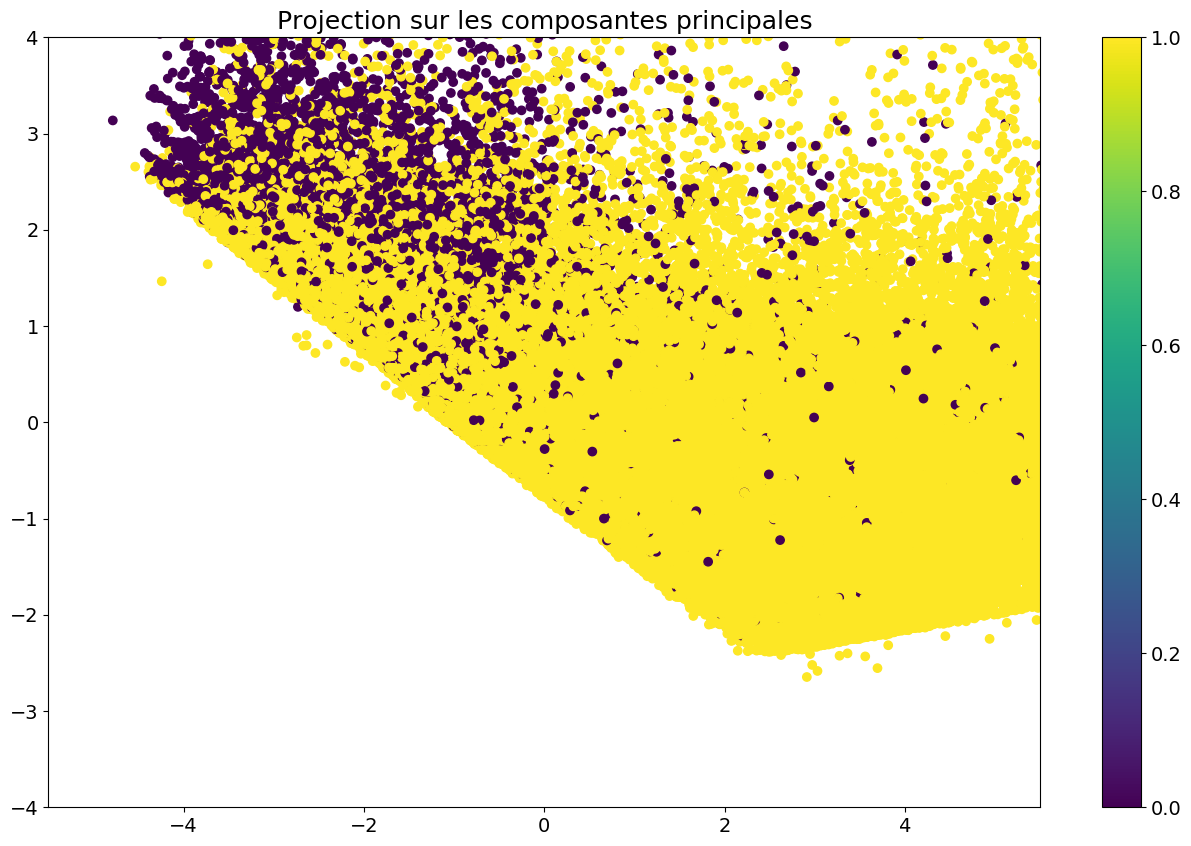

In [29]:
displayPCA(x_train, y_train)

## Sauvegarde

In [30]:
x_train.to_csv("save/x_train.csv", index=False, encoding="utf_8")
x_test.to_csv("save/x_test.csv", index=False, encoding="utf_8")
y_train.to_csv("save/y_train.csv", index=False, encoding="utf_8")
y_test.to_csv("save/y_test.csv", index=False, encoding="utf_8")
y_pred_actuelle.to_csv("save/y_pred_actuelle.csv", index=False, encoding="utf_8")

save_obj(x_train_reduced, 'x_train_reduced')
save_obj(x_test_reduced, 'x_test_reduced')

C:/Users/Mscao/Google Drive/Jupyter/GIT/Projet8/save/x_train_reduced.pkl saved
C:/Users/Mscao/Google Drive/Jupyter/GIT/Projet8/save/x_test_reduced.pkl saved


## Age des radiations

In [15]:
n='C:/Users/Mscao/OneDrive - INTESCIA/Export/rncs_radiations_PROD.csv'
dfRad = pd.read_csv(n, sep=";", na_values=r"\0", low_memory=False)
dfRad.describe()

siren  year(dateRad)-year(dateImma)  substr(CJ,1,1)
count  1.623792e+06                  1.623792e+06    1.623792e+06
mean   4.977713e+08                  9.960963e+00    3.966244e+00
std    1.323882e+08                  9.517932e+00    1.881434e+00
min    5.420104e+06                 -8.900000e+01    0.000000e+00
25%    4.196279e+08                  3.000000e+00    1.000000e+00
50%    4.886009e+08                  7.000000e+00    5.000000e+00
75%    5.190907e+08                  1.300000e+01    5.000000e+00
max    9.999905e+08                  8.090000e+02    9.000000e+00

In [16]:
dfRad[dfRad.iloc[:,3]<0]

siren    dateImma     dateRad  year(dateRad)-year(dateImma)  \
209      313757080  1990-08-09  1989-10-03                            -1   
267      316651025  2005-01-05  1992-11-18                           -13   
345      320934086  1990-02-08  1988-05-30                            -2   
385      323305078  2008-04-14  1992-12-08                           -16   
600      330500695  2008-04-30  2007-09-29                            -1   
816      339374886  1991-03-15  1990-11-29                            -1   
938      342340502  2008-03-31  2000-09-30                            -8   
1059     347584757  2004-01-16  1994-09-30                           -10   
1499     381548775  2005-03-29  1995-10-21                           -10   
1613     384020616  2006-02-02  1993-12-31                           -13   
2067     395355514  2008-03-18  1996-12-28                           -12   
2109     398226365  2008-05-15  2007-05-21                            -1   
2206     400090171  2008-04-07  2007-09-30                            -1   
2448     405255126  2000-10-23  1999-02-28                            -1   
2752     413168071  2008-03-27  2005-07-31                            -3   
2824     414494773  2008-04-03  2006-09-15                            -2   
2834     414649145  2008-03-10  2006-09-15                            -2   
2948     419080973  2008-06-10  2007-09-30                            -1   
3091     421524240  2008-05-22  2005-07-29                            -3   
3226     423132836  2008-04-16  2007-09-29                            -1   
3260     423606136  2008-04-22  2004-07-29                            -4   
3729     434341137  2008-03-27  2006-08-31                            -2   
3877     438286239  2008-06-05  2001-11-30                            -7   
4102     441038643  2008-04-03  2005-11-21                            -3   
4293     442860706  2008-05-07  2004-07-01                            -4   
4577     447870577  2008-03-31  2007-09-30                            -1   
5125     453160426  2008-05-22  2004-09-10                            -4   
5341     478322126  2008-06-18  2006-06-15                            -2   
6397     488455296  2007-12-19  2006-07-05                            -1   
6531     489391458  2008-02-29  2007-04-25                            -1   
6572     489674515  2008-04-01  2007-06-18                            -1   
6719     490642022  2008-06-05  2006-09-30                            -2   
7778     498605948  2008-03-25  2007-09-28                            -1   
12245    704404037  1996-02-19  1995-07-31                            -1   
12327    950356196  2008-05-26  2007-08-31                            -1   
13258    325621720  2008-03-19  1993-02-28                           -15   
13765    333338994  2003-02-17  1990-12-31                           -13   
13798    333729937  2007-09-25  1999-12-29                            -8   
14893    349932087  2008-06-20  1991-02-17                           -17   
15732    381074897  2002-09-20  1993-07-19                            -9   
16257    385299011  2008-06-12  1994-08-24                           -14   
17724    400431243  2007-12-12  1995-11-08                           -12   
17916    401723762  2007-11-05  2006-05-31                            -1   
18221    403835531  1999-02-02  1998-06-22                            -1   
21869    435134101  2008-01-31  2001-06-30                            -7   
22154    438450280  2008-03-03  2001-09-03                            -7   
22219    438746687  2007-11-30  2003-10-15                            -4   
22664    440601581  2008-04-09  2002-06-26                            -6   
49310    453660607  2008-06-16  2007-09-30                            -1   
50891    309938405  2008-06-24  2006-09-30                            -2   
...            ...         ...         ...                           ...   
243158   318682010  2001-11-05  1992-03-12                   

In [21]:
dfRad.groupby('substr(CJ,1,1)')['year(dateRad)-year(dateImma)'].count()

substr(CJ,1,1)
0       2766
1     452090
2         14
3       6054
4         71
5    1007080
6     155684
7          5
9         28
Name: year(dateRad)-year(dateImma), dtype: int64

In [20]:
dfRad.groupby('substr(CJ,1,1)')['year(dateRad)-year(dateImma)'].mean()

substr(CJ,1,1)
0     7.260304
1     9.140671
2    11.571429
3     8.218368
4    13.464789
5     9.574843
6    14.952603
7    30.000000
9    18.142857
Name: year(dateRad)-year(dateImma), dtype: float64